# CMSE 201 Final Project 


# Navid Ali
###  Section_001
#### 12/6/22

# 1 The Trend of Major Causes of Death in the U.S.

## 1.1 Background and Motivation

Mortality rate describes the impact of a disease within a population of interest. Over the past few years, the pandemic has had an immense effect on different aspects of life around the world, most importantly it has led to extreme measures and limitations within healthcare as well as social affairs. Data on leading causes of death is a useful indication to a population's health status that can supplement other mortality measures. “They provide a snapshot of current health problems, suggest persistent patterns of risk in specific communities, and show trends in specific causes of death over time,”(cite 1). Many causes of death are preventable or treatable and, therefore, warrant the attention of public health prevention efforts. With the limited access to healthcare, and the stress and vulnerability facing the public as well as other factors such as the pandemic of mistrust due to extreme polarization, it is essential to investigate mortality rate by cause up to date. The analysis and acknowledgement of such trends will allow the healthcare system and the people to propose effective health related programs based on new and previous strategies.

Age is a confounding variable which doesn't affect the heatlh event yet affects the people. Age adjusted death rate is another measure which will be investigated to some extents. This measure allows for a fair comparison between groups with different age distributions. As the death rate across a time period is being investigated and compared, and with the likelihood of older people getting ill and younger people getting injured easily, the use of age adjusted death rate for the causes will make the study more accurate. 

How has the trend for major causes of death transformed since 1999 in the US?
What are the leading causes of death in the US and what will the mortality rate for these causes be by 2028?


## 1.2 Methodology

Among several sources of health records, The Centers for Disease Control and Prevention (CDC) organization with a mission to save lives and protect people from health threats is one of the most well known platforms with health information and critical science. The following dataset consisting of major causes of death was provided by the CDC. Mortality data by cause from 1999 to 2021. There are multiple files accounting for similar causes yet different time ranges. 

In [1]:
#import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression

## Importing the data files


In [2]:
#death by major causes 1999 to 2017
data = pd.read_csv('NCHS death_causes.csv')
data.head()

Year                                     113 Cause Name  \
0  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
1  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
2  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
3  2017  Accidents (unintentional injuries) (V01-X59,Y8...   
4  2017  Accidents (unintentional injuries) (V01-X59,Y8...   

               Cause Name          State  Deaths  Age-adjusted Death Rate  
0  Unintentional injuries  United States  169936                     49.4  
1  Unintentional injuries        Alabama    2703                     53.8  
2  Unintentional injuries         Alaska     436                     63.7  
3  Unintentional injuries        Arizona    4184                     56.2  
4  Unintentional injuries       Arkansas    1625                     51.8

### 113 Cause Name: long name for Cause name and not required

In [3]:
data.drop('113 Cause Name', axis = 1, inplace = True)

#check for the Dtype and null values 
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   Cause Name               10868 non-null  object 
 2   State                    10868 non-null  object 
 3   Deaths                   10868 non-null  int64  
 4   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 424.7+ KB


In [4]:
#read the data file accounting for mortality by cause 2014-2019

data_19 = pd.read_csv('Monthly_Counts_of_Deaths_by_Select_Causes__2014-2019.csv')

#check Dtype of variables and notnull values
data_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 21 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Jurisdiction of Occurrence                                                                72 non-null     object
 1   Year                                                                                      72 non-null     int64 
 2   Month                                                                                     72 non-null     int64 
 3   All Cause                                                                                 72 non-null     int64 
 4   Natural Cause                                                                             72 non-null     int64 
 5   Septicemia                                                        

In [5]:
#import mortality data by cause 2020-2021

data_22 = pd.read_csv\
('Monthly_Provisional_Counts_of_Deaths_by_Select_Causes__2020-2022.csv')

#check for null values and Dtypes
data_22.info()
data_22.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 31 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Data As Of                                                                               35 non-null     object 
 1   Start Date                                                                               35 non-null     object 
 2   End Date                                                                                 35 non-null     object 
 3   Jurisdiction of Occurrence                                                               35 non-null     object 
 4   Year                                                                                     35 non-null     int64  
 5   Month                                                             

Data As Of  Start Date    End Date Jurisdiction of Occurrence  Year  Month  \
0  11/23/2022  01/01/2020  01/31/2020              United States  2020      1   
1  11/23/2022  02/01/2020  02/29/2020              United States  2020      2   
2  11/23/2022  03/01/2020  03/31/2020              United States  2020      3   
3  11/23/2022  04/01/2020  04/30/2020              United States  2020      4   
4  11/23/2022  05/01/2020  05/31/2020              United States  2020      5   

   All Cause  Natural Cause  Septicemia  Malignant Neoplasms  ...  \
0     264681         242914        3687                52635  ...   
1     244966         224343        3324                48764  ...   
2     269806         247634        3669                51640  ...   
3     322424         300780        3366                48773  ...   
4     280564         255489        3085                49012  ...   

   Intentional Self-Harm (Suicide)  Assault (Homicide)  Drug Overdose  \
0                           4040.0              1708.0         6547.0   
1                           3672.0              1471.0         6435.0   
2                           3952.0              1693.0         7268.0   
3                           3480.0              1756.0         7938.0   
4                           3769.0              2067.0         9466.0   

   COVID-19 (Multiple Cause of Death)  COVID-19 (Underlying Cause of Death)  \
0                                   6                                     4   
1                                  25                                    20   
2                                7175                                  6785   
3                               65553                                 62014   
4                               38330                                 35279   

   flag_accid  flag_mva  flag_suic  flag_homic  flag_drugod  
0         NaN       NaN        NaN         NaN          NaN  
1         NaN       NaN        NaN         NaN          NaN  
2         NaN       NaN        NaN         NaN          NaN  
3         NaN       NaN        NaN         NaN          NaN  
4         NaN       NaN        NaN         NaN          NaN  

[5 rows x 31 columns]

With the info provided for each data file, it is evident that the data accounting for years 1999-2017 and data file for 2014 to 2019 have accurate data types and non-null values. However the data file accounting for the years 2020-2022 seem to have significant number of null values, especifically for the year 2022 and the corresponding causes that are not under the scope of my investigation within this project. Such attributes will be resolved later by dropping them.

In [6]:
#col_cause = data_22.columns.values
col_cause = ['Septicemia','Diseases of Heart','Drug Overdose',\
             "COVID-19 (Multiple Cause of Death)",\
             'COVID-19 (Underlying Cause of Death)',\
             'Malignant Neoplasms','Diabetes Mellitus',\
            'Alzheimer Disease','Influenza and Pneumonia',\
             'Chronic Lower Respiratory Diseases',\
            "Nephritis, Nephrotic Syndrome and Nephrosis",\
            "Cerebrovascular Diseases",'Accidents (Unintentional Injuries)',\
            'Motor Vehicle Accidents','Assault (Homicide)']

#data from 1999-2017 file
#different causes of death
causes = (data['Cause Name'].unique())

#remove all causes
index = 1
causes = np.delete(causes,index)

#display the categories in an array
causes

array(['Unintentional injuries', "Alzheimer's disease", 'Stroke', 'CLRD',
       'Diabetes', 'Heart disease', 'Influenza and pneumonia', 'Suicide',
       'Cancer', 'Kidney disease'], dtype=object)

The follwing cells are used to plot the mortality rate with different timesets depending on the availability of within the data files repsectively. The visualization of mortality rate by year is the main scope of this project, however the provided montly outcomes will be beneficial on discerning similar or different associations. 

first criteria: Investigate the trends of mortality rate by cause  and determine the top leading causes of death for further analysis

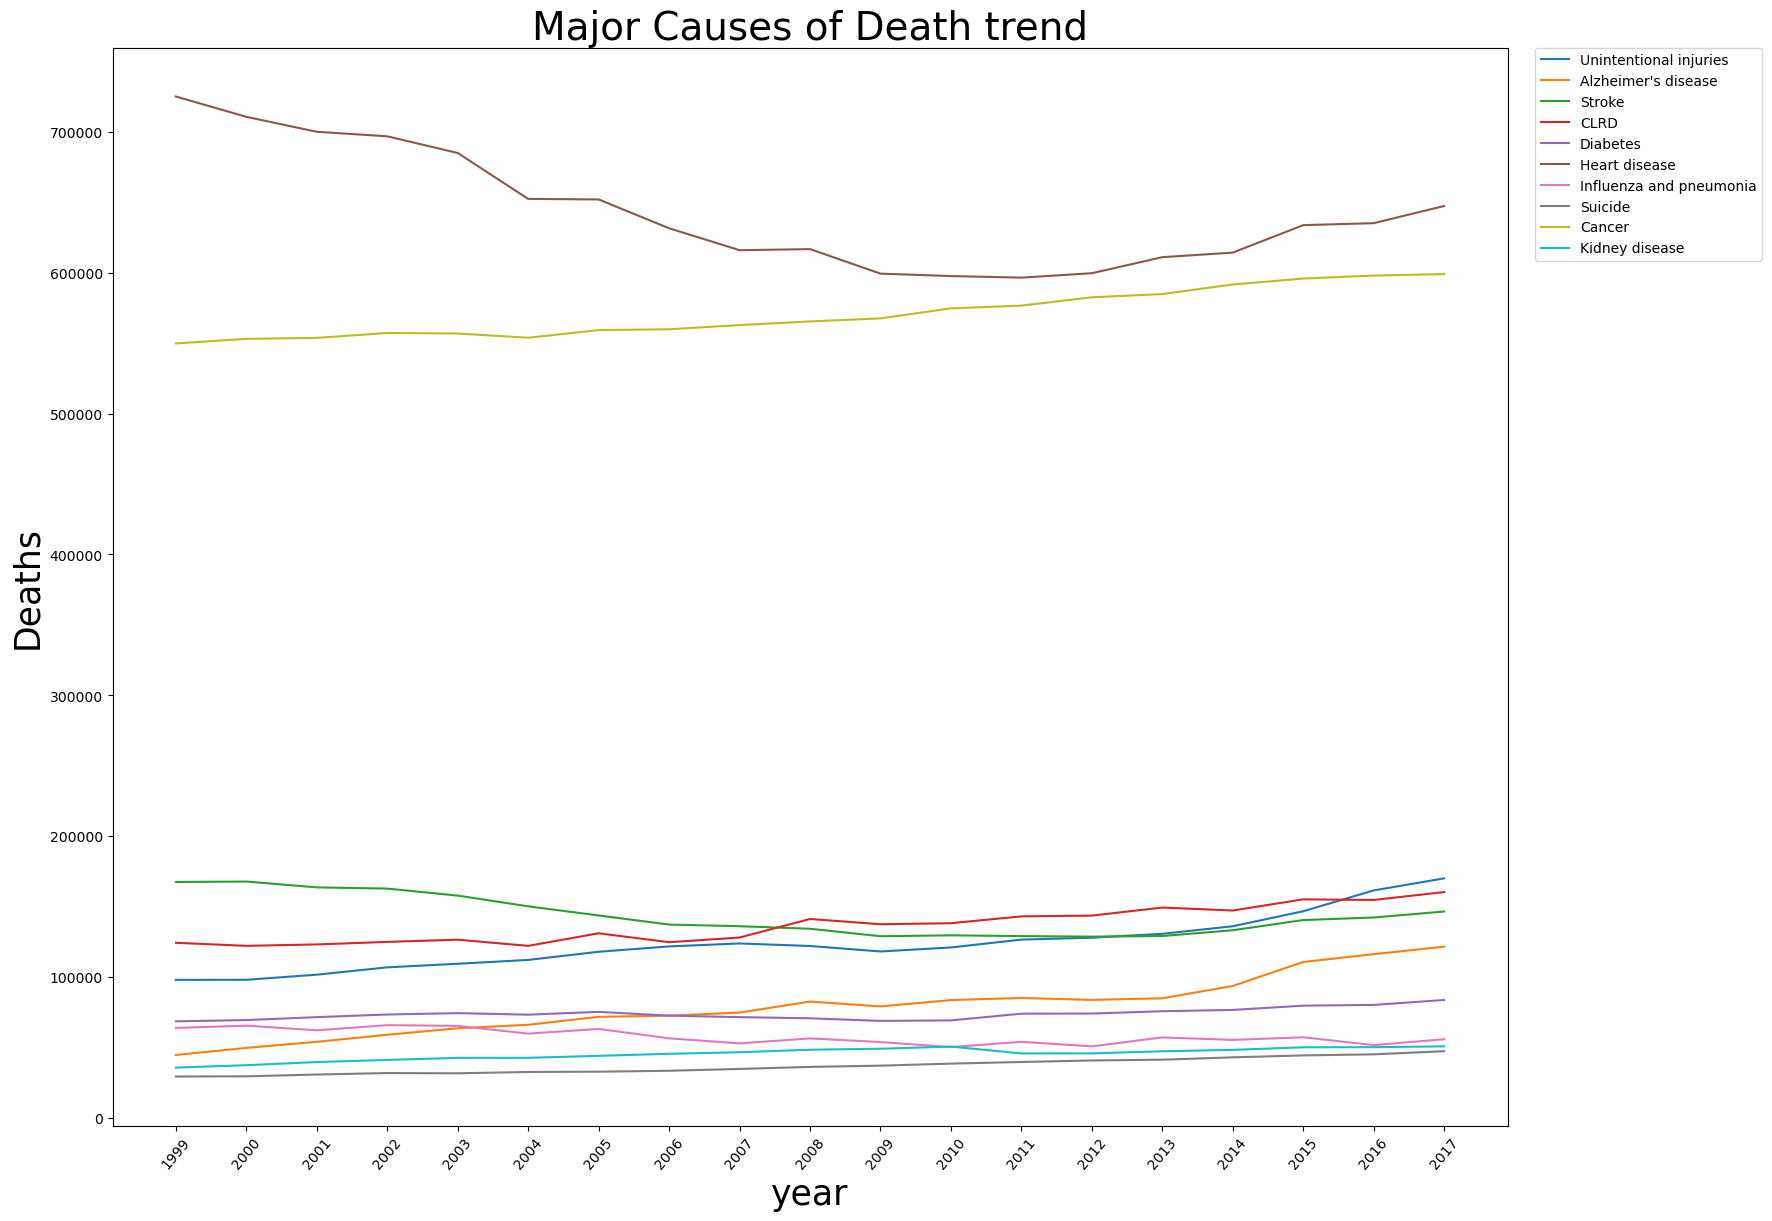

In [7]:
plt.figure(figsize = (18,14))
#using a function, visualize the trend from 1999-2017
def trendline(cause):
    timeline = []                               #x_axis or years
    time_data = []                              #y_axis, or deaths
    
    for i in range(len(data['Deaths'])):
        if data['Cause Name'][i] == cause and data['State'][i] == 'United States':
            #store the data (deaths)
            timeline.append(data['Year'][i])
            time_data.append(data['Deaths'][i])
    
    #plot the results to show the trendline
    plt.plot(timeline,time_data, label = cause)
    plt.xticks(timeline, rotation = 50)
    
    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)
    plt.legend()
    
    return trendline

#plot the trend for each causes of death using the function
for i in (causes):
    trendline(i)

plt.title('Major Causes of Death trend', fontsize = 28)
plt.xlabel('year', fontsize = 25)
plt.ylabel('Deaths', fontsize = 25)
#plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



The overall Mortality rate by various causes within one plot allows us to easily compare them with one another and determine the variables with the most effect throughout the years. A representation and analysis of the given data in more details such that represents the monthly trends would be highly effective and beneficial. 

The graph above shows that above all provided causes of death, Heart disease and Cancer are the top leading causes. 



 since the data accounting for 2014-2019 is a nationwide dataset, the column 'Jurisdiction of occurrence' and 'All Cause' is unnecessary


In [8]:
data_19 = data_19.drop(columns = ['Jurisdiction of Occurrence','All Cause'])

In [9]:
#indicate the causes associated with the dataset from 2014-2019
cols = list(data_19.columns)


#drop the causes with lowest number of deaths
cols.pop(0)
cols.pop(0)
cols.pop(0)
cols.pop(0)
cols.pop(7)
cols.pop(13)
cols.pop(12)
cols.pop(6)


cols

['Malignant Neoplasms',
 'Diabetes Mellitus',
 'Alzheimer Disease',
 'Influenza and Pneumonia',
 'Chronic Lower Respiratory Diseases',
 'Other Diseases of Respiratory System',
 'Diseases of Heart',
 'Cerebrovascular Diseases',
 'Accidents (Unintentional Injuries)',
 'Motor Vehicle Accidents',
 'Intentional Self-Harm (Suicide)']

The following cell creates subplots representing the mortality rates of the causes listed within the array cols as initialized in the previous cell and provides deaths by month for years 2014-2019. The relationship and the pattern between the variables would be more clearly discerned when using the follwing nested loop set up. The same procedure will be incorporated within the dataset for years 2020-2021

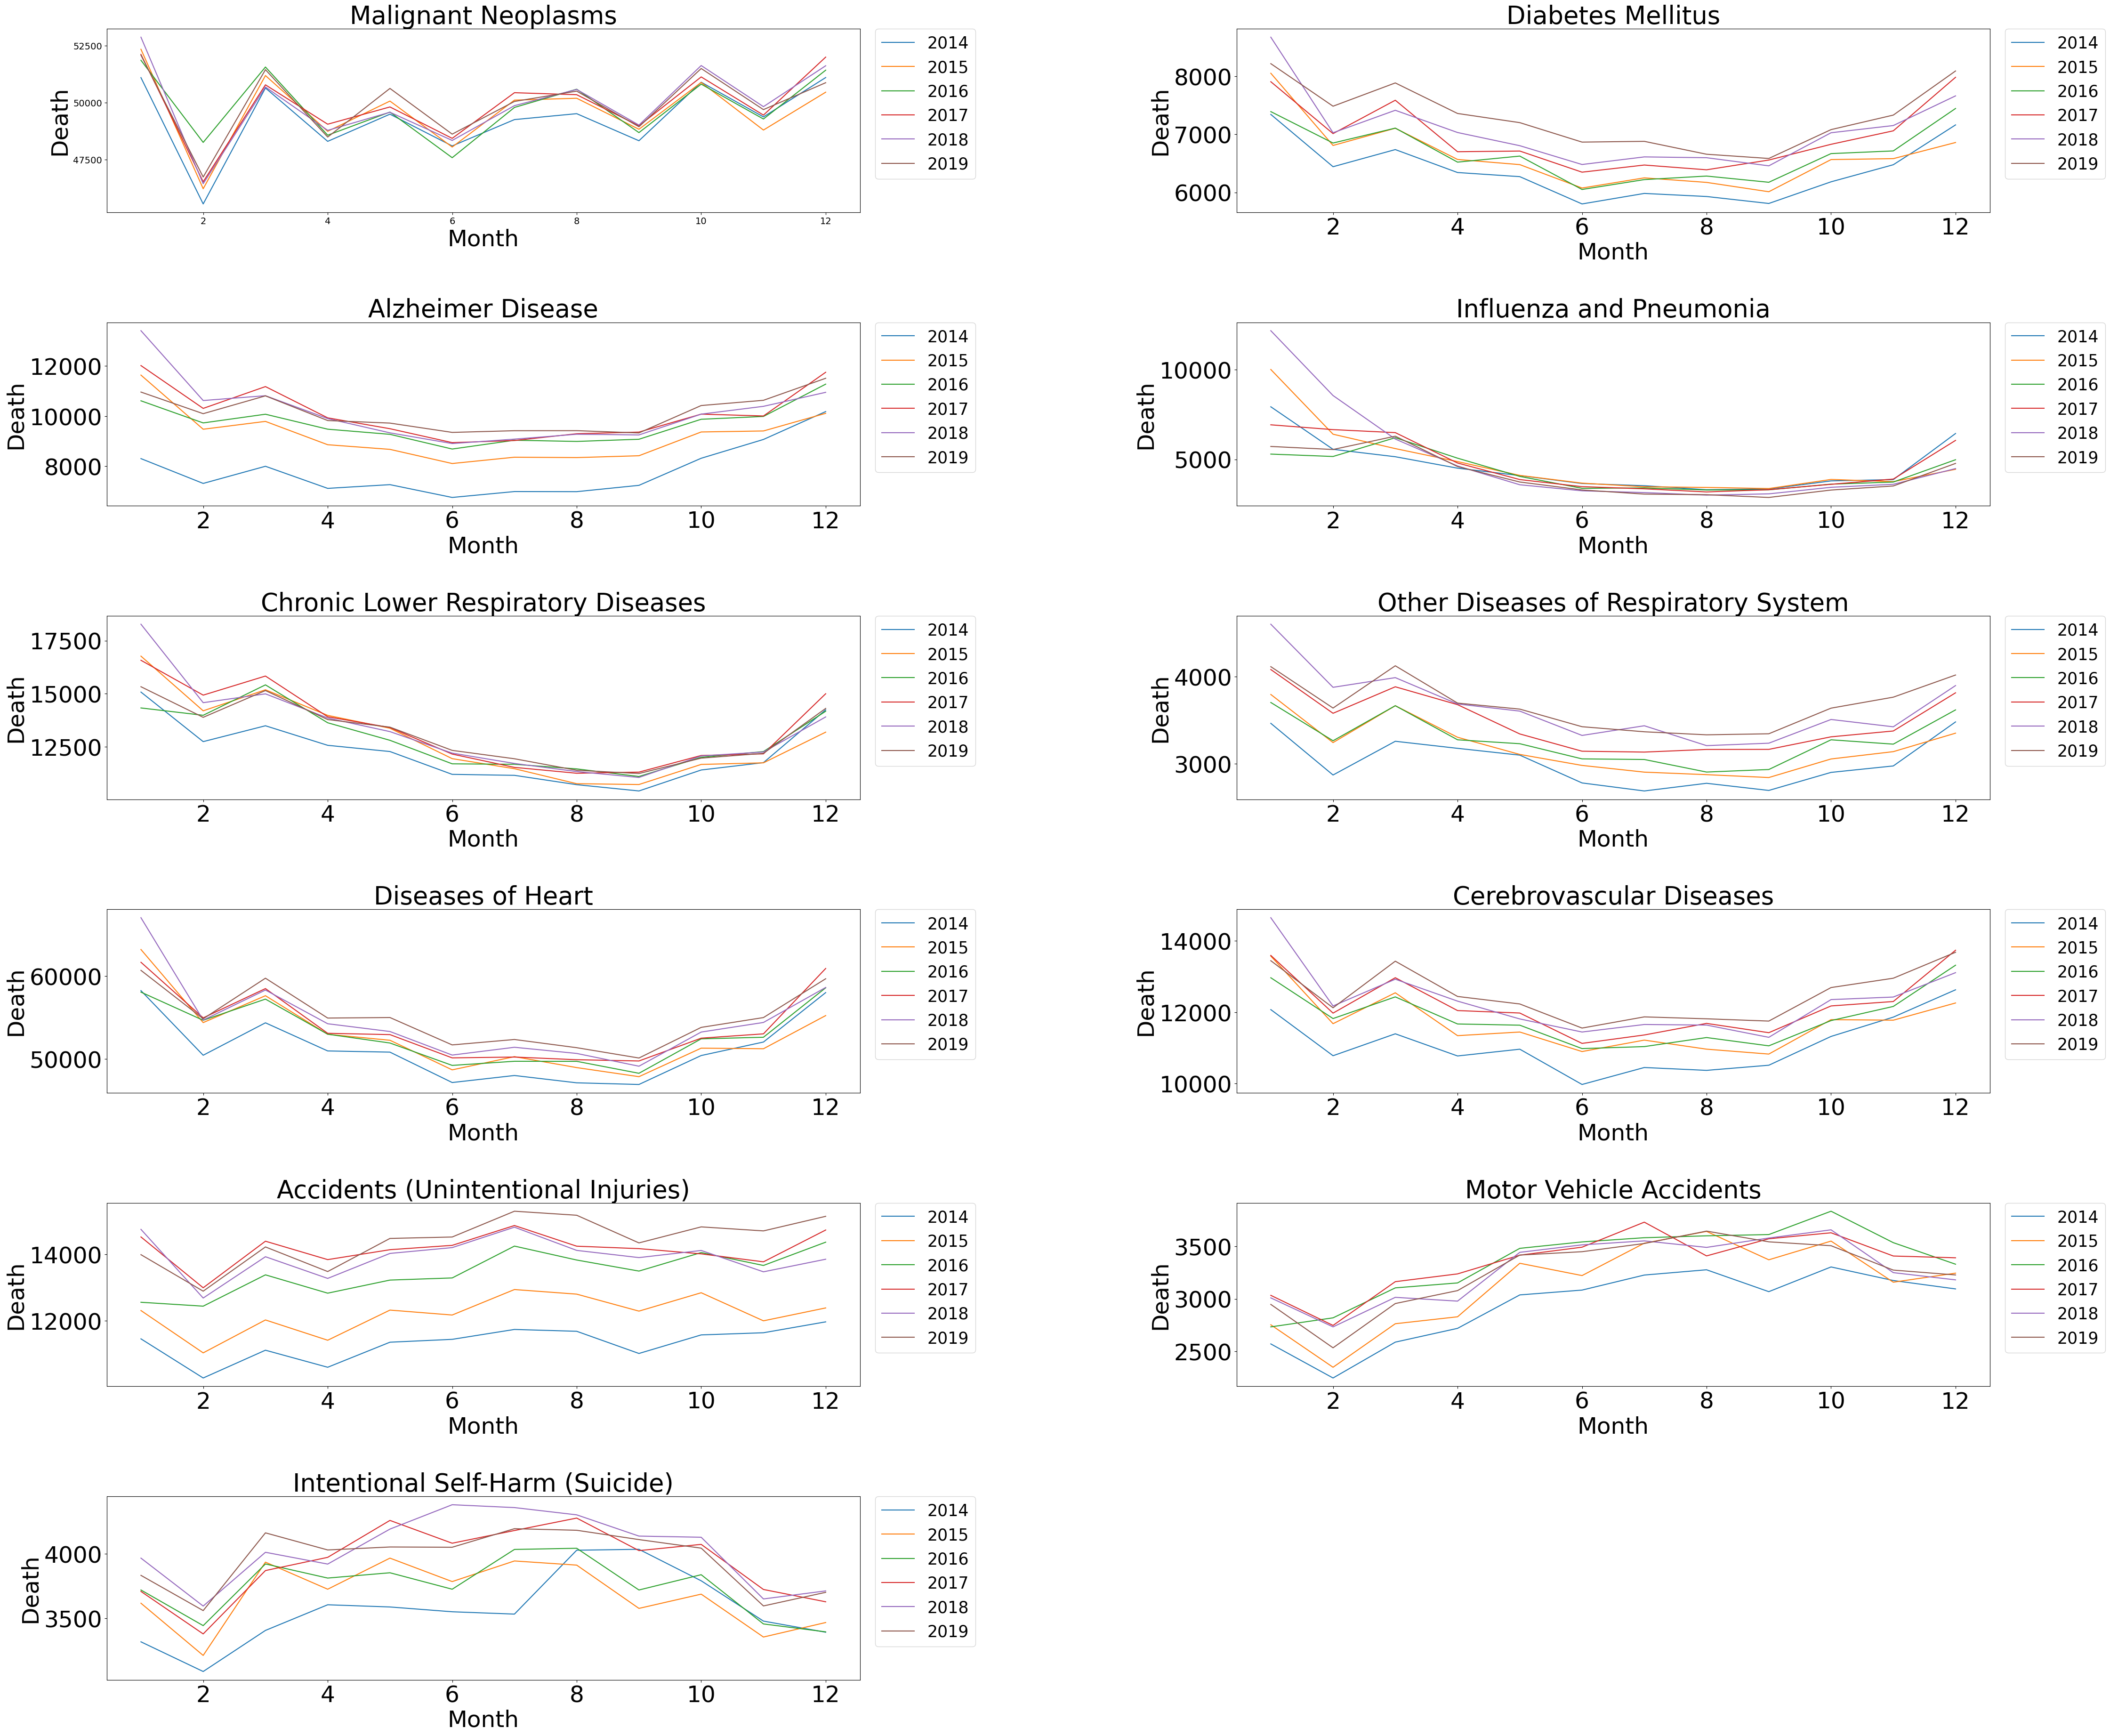

In [10]:

#visualize the data in an effective and detailed way 
def by_cause_month(cause):
    
    
    for year in range(2014,2020):
        df_year = data_19[data_19['Year']==year] #year mask 
        year_list = []
        for month in range(1,13):
            df_month = df_year[df_year['Month']==month]  #month mask
            year_list.append(df_month[cause])
        
        
        plt.plot(range(1,13), year_list, label = year)
        plt.title(cause, fontsize = 38)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,\
              fontsize = 25)

    plt.xlabel('Month', fontsize = 35)
    plt.ylabel('Death',fontsize = 35)
    
    plt.rc('xtick',labelsize=35)
    plt.rc('ytick',labelsize=35)
    
    return by_cause_month
count = 0


#visualize the trendline for each cause of death associated with dataset (14-19)
plt.figure(figsize = (100,150))


for i in cols:
    count += 1 
    plt.subplot(10,2,count)
    by_cause_month(i)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=0.5,
                    wspace=0.5,
                    hspace=0.6)

In [11]:
data_22.drop(labels = range(24,35), axis = 0, inplace = True)

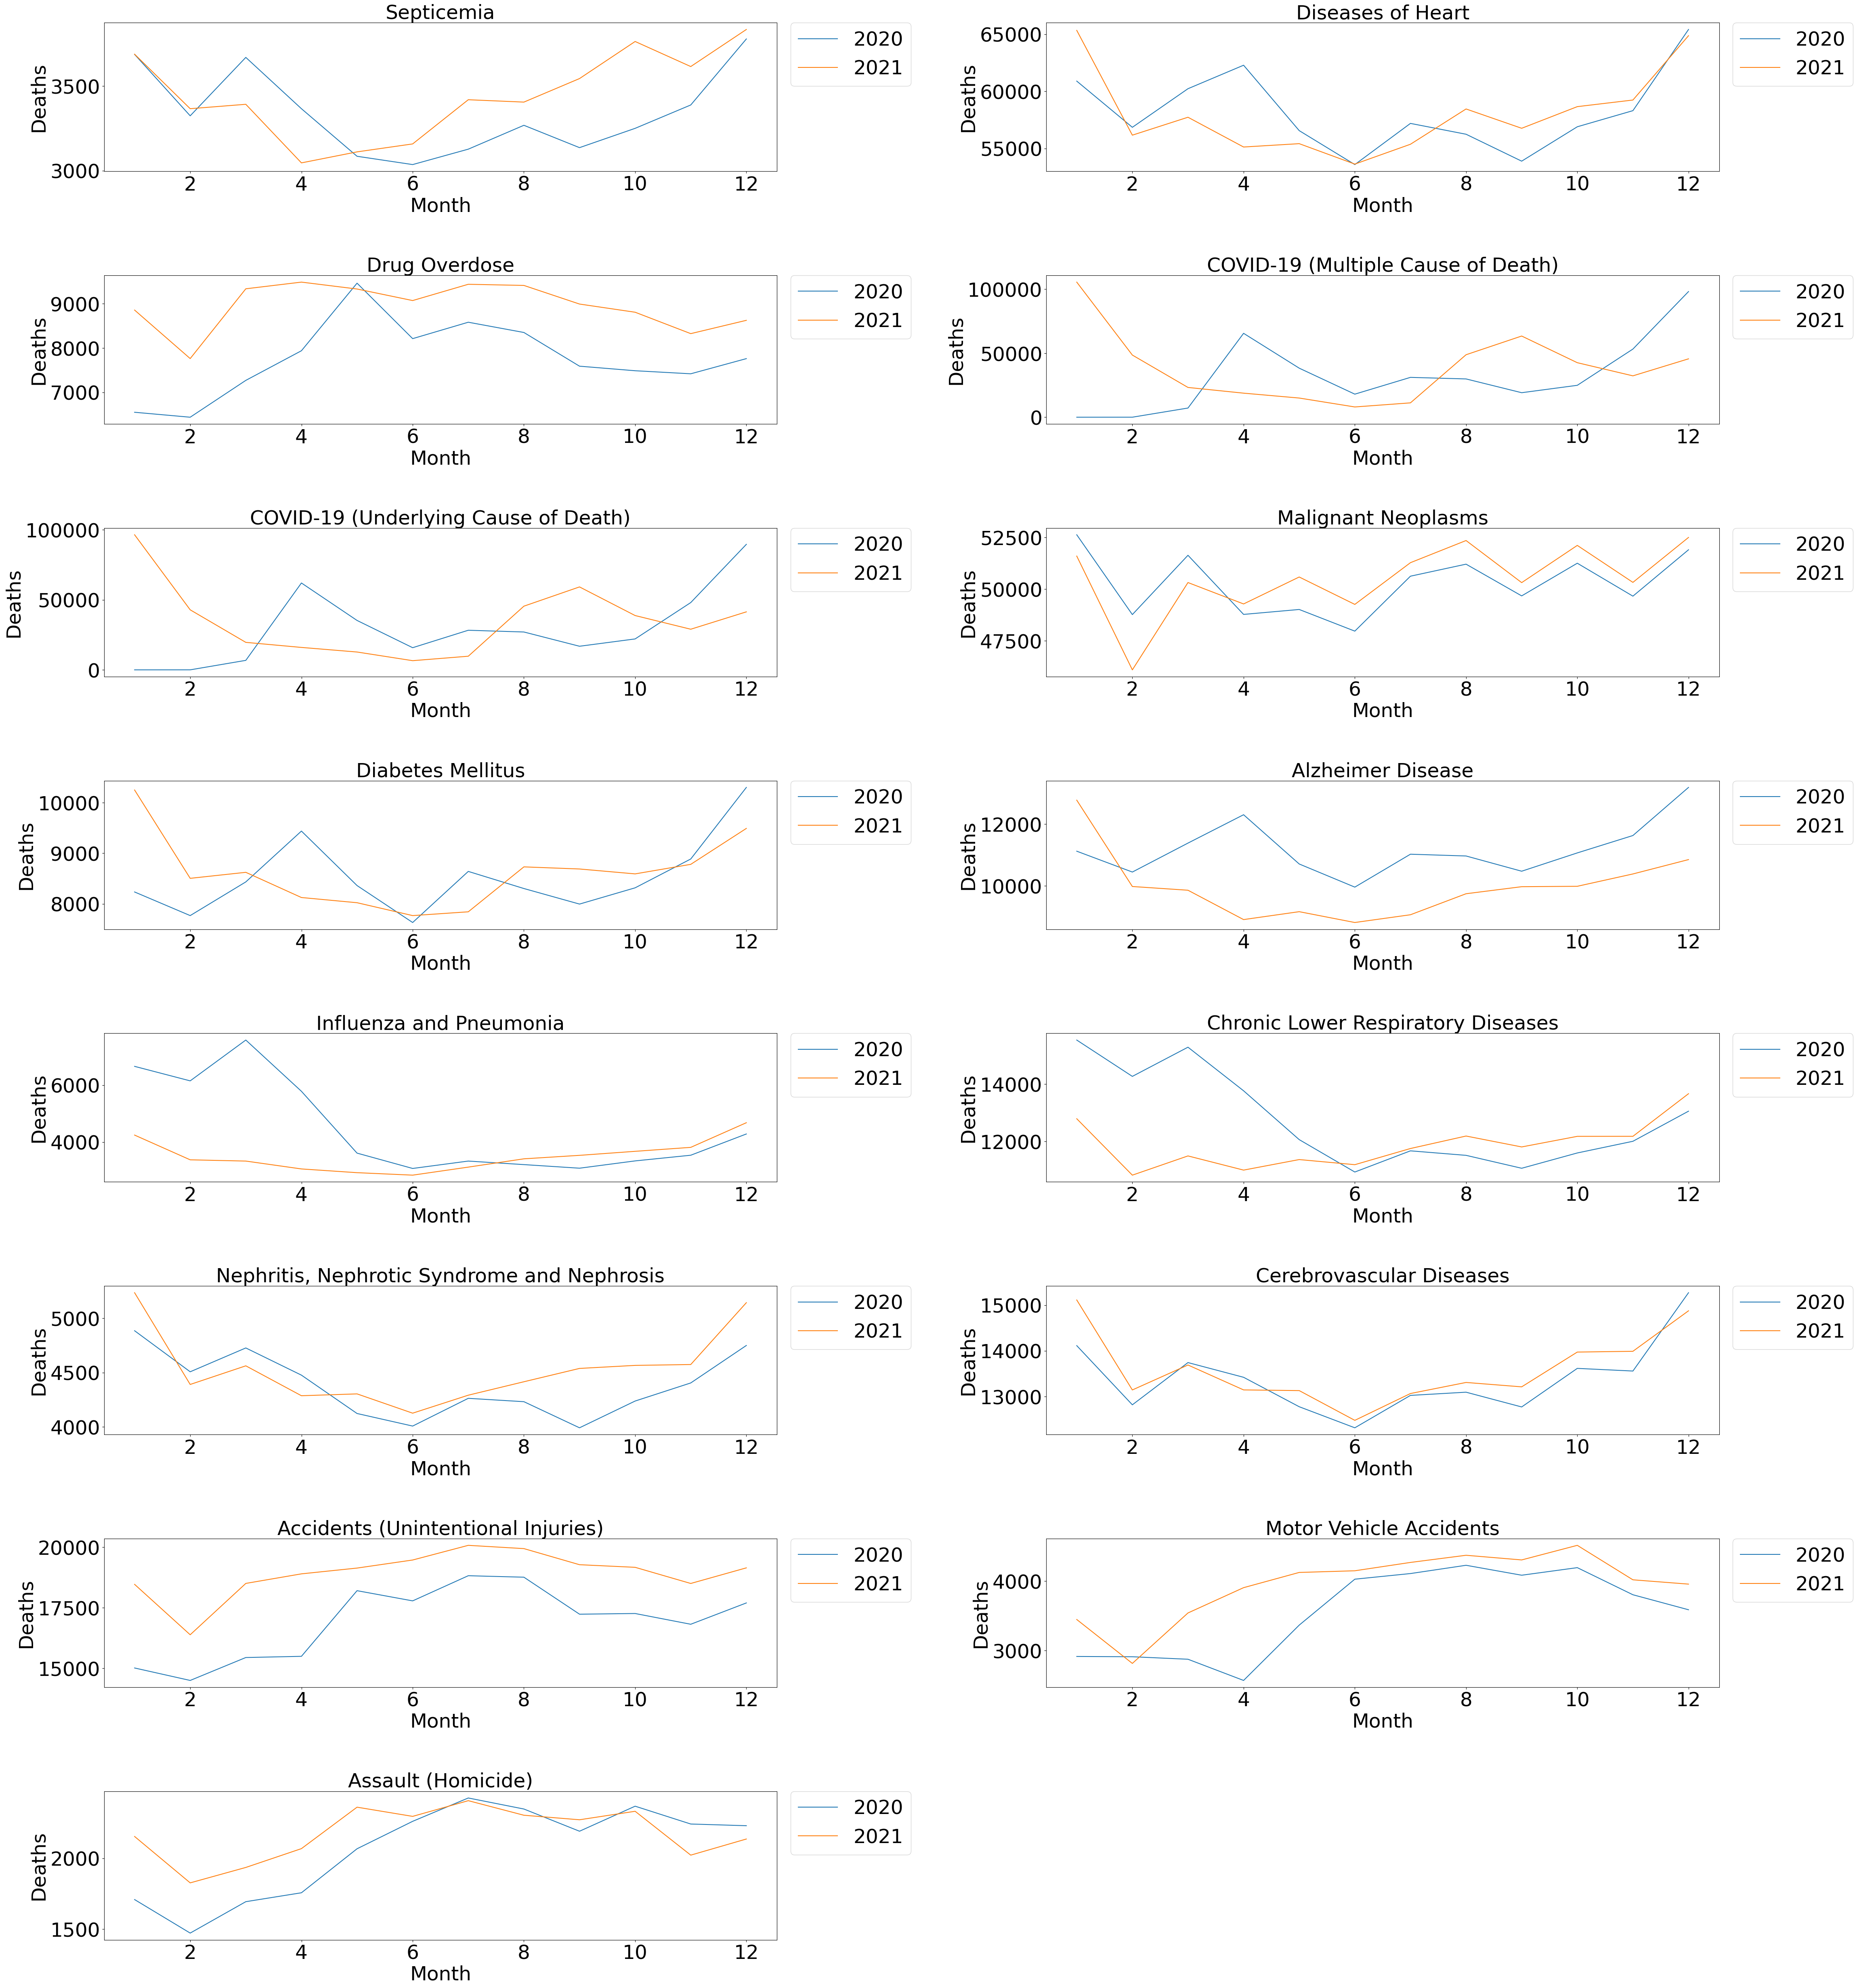

In [12]:
plt.figure(figsize = (100,150))
#fig = plt.figure(figsize=(100,100))

def trend_by_month(cause):
    for year in range(2020,2023):
        df_year = data_22[data_22['Year']==year] #year mask 
        year_list = []
        for month in range(1,13):
            df_month = df_year[df_year['Month']==month]  #month mask
            year_list.append(df_month[cause])

        plt.plot(range(1,13), year_list, label = year)
        plt.title(cause,fontsize = 35)
    
    plt.xlabel('Month', fontsize = 35)
    plt.ylabel('Deaths', fontsize = 35)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,\
               fontsize = 35)
    plt.tight_layout()




    return trend_by_month

count = 0

for i in col_cause:
    count += 1 
    plt.subplot(10,2,count)
    trend_by_month(i)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=0.5,
                    wspace=0.4,
                    hspace=0.7)

The representation of each cause on its own subplot over the twelve months of each year help differentiate and demonstrate the trendline over the course of a year for several years. The comparison can easily be discerned by the shape of the distributions.

- Based on the data for major causes of death from 1999 to 2017, the top two leading causes of death are Heart disease (ranked first) and Cancer (ranked second).
- Heart disease was the leading cause of death nationally in 2020 and 2021.


The data from the years 2017 and beyond as well as the data represented above will be clustered and reduced with a focus on the top two leading causes of deaths in the United States. The deaths associated with Heart disease and Cancer will be accesses and combined from the data files and and a projection will be made for the next 6 years.

In [13]:
#intialize lists for deaths due to Heart disease
Heart_disease = []
timeline_ = []

for i in range(len(data['Deaths'])):
    if data['Cause Name'][i] == 'Heart disease' and data['State'][i]== 'United States':
        Heart_disease.append(data['Deaths'][i])
        timeline_.append(data['Year'][i])

#the lists are originally in decending order, ascending order will be useful later
Heart_disease.reverse()
timeline_.reverse()



#intialize lists for deaths due to Cancer
Cancer_disease = []


for i in range(len(data['Deaths'])):
    if data['Cause Name'][i] == 'Cancer' and data['State'][i]== 'United States':
        Cancer_disease.append(data['Deaths'][i])

Cancer_disease.reverse()



Text(0.5, 1.0, 'Major Causes of Death trend')

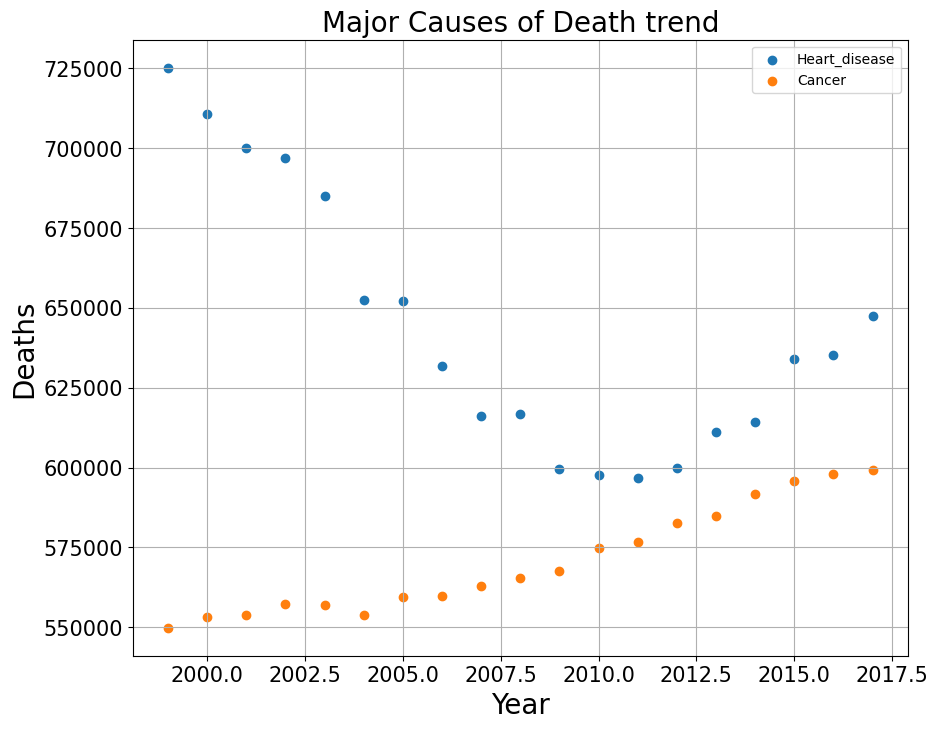

In [18]:
#make a visualization of the collected data
#run twice to get updated and scaled visuals
plt.figure(figsize = (10,8))
plt.scatter(timeline_, Heart_disease, label = 'Heart_disease')
plt.scatter(timeline_, Cancer_disease, label = 'Cancer')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Deaths', fontsize =20)
plt.legend()
plt.grid()
plt.title('Major Causes of Death trend',fontsize =20)



In [19]:
data_19_yr = data_19.groupby(['Year']).sum()


data_19_yr = data_19_yr.rename(columns = {'Malignant Neoplasms':'Cancer'})
data_19_yr =  data_19_yr.rename(columns = {'Diseases of Heart':'Heart disease'})
data_19_yr.head()

Month  Natural Cause  Septicemia  Cancer  Diabetes Mellitus  \
Year                                                                
2014     78        2424126       38940  591700              76488   
2015     78        2495936       40773  595930              79535   
2016     78        2509054       40613  598038              80058   
2017     78        2566005       40922  599108              83564   
2018     78        2594018       40718  599274              84946   

      Alzheimer Disease  Influenza and Pneumonia  \
Year                                               
2014              93541                    55227   
2015             110561                    57062   
2016             116103                    51537   
2017             121404                    55672   
2018             122019                    59120   

      Chronic Lower Respiratory Diseases  \
Year                                       
2014                              147101   
2015                              155041   
2016                              154596   
2017                              160201   
2018                              159486   

      Other Diseases of Respiratory System  \
Year                                         
2014                                 36187   
2015                                 38286   
2016                                 39224   
2017                                 41693   
2018                                 43814   

      Nephritis, Nephrotic Syndrome, and Nephrosis  \
Year                                                 
2014                                         48146   
2015                                         49959   
2016                                         50046   
2017                                         50633   
2018                                         51386   

      Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified  \
Year                                                                                             
2014                                              32242                                          
2015                                              32042                                          
2016                                              33373                                          
2017                                              32750                                          
2018                                              32537                                          

      Heart disease  Cerebrovascular Diseases  \
Year                                            
2014         614348                    133103   
2015         633842                    140323   
2016         635260                    142142   
2017         647457                    146383   
2018         655381                    147810   

      Accidents (Unintentional Injuries)  Motor Vehicle Accidents  \
Year                                                                
2014                              135928                    35398   
2015                              146571                    37757   
2016                              161374                    40327   
2017                              169936                    40231   
2018                              167127                    39404   

      Intentional Self-Harm (Suicide)  Assault (Homicide)  Drug Overdose  
Year                                                                      
2014                            42826               15872          47055  
2015                            44193               17793          52404  
2016                            44965               19362          63632  
2017                            47173               19510          70237  
2018                            48344               18830          67367

Columns with null values and which are unnecessary.
There are lots of missing values for causes including flag accid, flag mva, flag homic, flag drugod and flag suic. The number of deaths associated with these are also very low, hence with it's ambiguity and the null values, I decided to drop these columns. Since the data on mortality rate for this year (2022) is incomplete, I decided to not include it within my project as it would potentially be a major outlier and skew the results. 

In [20]:
data_22.drop(columns = ['flag_accid', 'flag_mva','flag_homic',\
                       'flag_drugod','flag_suic'],\
             axis = 1, inplace = True)
data_22.head()

Data As Of  Start Date    End Date Jurisdiction of Occurrence  Year  Month  \
0  11/23/2022  01/01/2020  01/31/2020              United States  2020      1   
1  11/23/2022  02/01/2020  02/29/2020              United States  2020      2   
2  11/23/2022  03/01/2020  03/31/2020              United States  2020      3   
3  11/23/2022  04/01/2020  04/30/2020              United States  2020      4   
4  11/23/2022  05/01/2020  05/31/2020              United States  2020      5   

   All Cause  Natural Cause  Septicemia  Malignant Neoplasms  ...  \
0     264681         242914        3687                52635  ...   
1     244966         224343        3324                48764  ...   
2     269806         247634        3669                51640  ...   
3     322424         300780        3366                48773  ...   
4     280564         255489        3085                49012  ...   

   Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified  \
0                                               2755                                         
1                                               2599                                         
2                                               2808                                         
3                                               2826                                         
4                                               2524                                         

   Diseases of Heart  Cerebrovascular Diseases  \
0              60896                     14113   
1              56851                     12818   
2              60229                     13742   
3              62285                     13420   
4              56561                     12776   

   Accidents (Unintentional Injuries)  Motor Vehicle Accidents  \
0                             15012.0                   2914.0   
1                             14497.0                   2910.0   
2                             15444.0                   2874.0   
3                             15493.0                   2569.0   
4                             18205.0                   3365.0   

   Intentional Self-Harm (Suicide)  Assault (Homicide)  Drug Overdose  \
0                           4040.0              1708.0         6547.0   
1                           3672.0              1471.0         6435.0   
2                           3952.0              1693.0         7268.0   
3                           3480.0              1756.0         7938.0   
4                           3769.0              2067.0         9466.0   

   COVID-19 (Multiple Cause of Death)  COVID-19 (Underlying Cause of Death)  
0                                   6                                     4  
1                                  25                                    20  
2                                7175                                  6785  
3                               65553                                 62014  
4                               38330                                 35279  

[5 rows x 26 columns]

In [21]:
data_22_yr = data_22.groupby(['Year']).sum()  #adjusting the data by year
data_22_yr.rename(columns = {'Malignant Neoplasms':'Cancer'}, inplace =True)
data_22_yr.head()

Month  All Cause  Natural Cause  Septicemia  Cancer  Diabetes Mellitus  \
Year                                                                           
2020     78    3390079        3103810       40114  603112             102308   
2021     78    3471732        3157412       41341  606030             103419   

      Alzheimer Disease  Influenza and Pneumonia  \
Year                                               
2020             134271                    53635   
2021             119442                    42012   

      Chronic Lower Respiratory Diseases  \
Year                                       
2020                              152763   
2021                              142449   

      Other Diseases of Respiratory System  ...  \
Year                                        ...   
2020                                 45160  ...   
2021                                 45953  ...   

      Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified  \
Year                                                                                            
2020                                              33041                                         
2021                                              34998                                         

      Diseases of Heart  Cerebrovascular Diseases  \
Year                                                
2020             698359                    160516   
2021             696770                    163114   

      Accidents (Unintentional Injuries)  Motor Vehicle Accidents  \
Year                                                                
2020                            203033.0                  42654.0   
2021                            226987.0                  47399.0   

      Intentional Self-Harm (Suicide)  Assault (Homicide)  Drug Overdose  \
Year                                                                       
2020                          46163.0             24761.0        93052.0   
2021                          48148.0             26113.0       107465.0   

      COVID-19 (Multiple Cause of Death)  COVID-19 (Underlying Cause of Death)  
Year                                                                            
2020                              385676                                351829  
2021                              463203                                417868  

[2 rows x 21 columns]

In [22]:
#manually input the missing data from 2018 to 2021 and store it with other values
cancer_18_21 = [599274,599601,603112,606030]
heart_18_21 = [655381,659041,698359,696770]

#organizing the data from 2018-2021 (up to date)
Heart_disease.extend(heart_18_21)
Cancer_disease.extend(cancer_18_21)

Text(0.5, 1.0, 'Major Causes of Death trend')

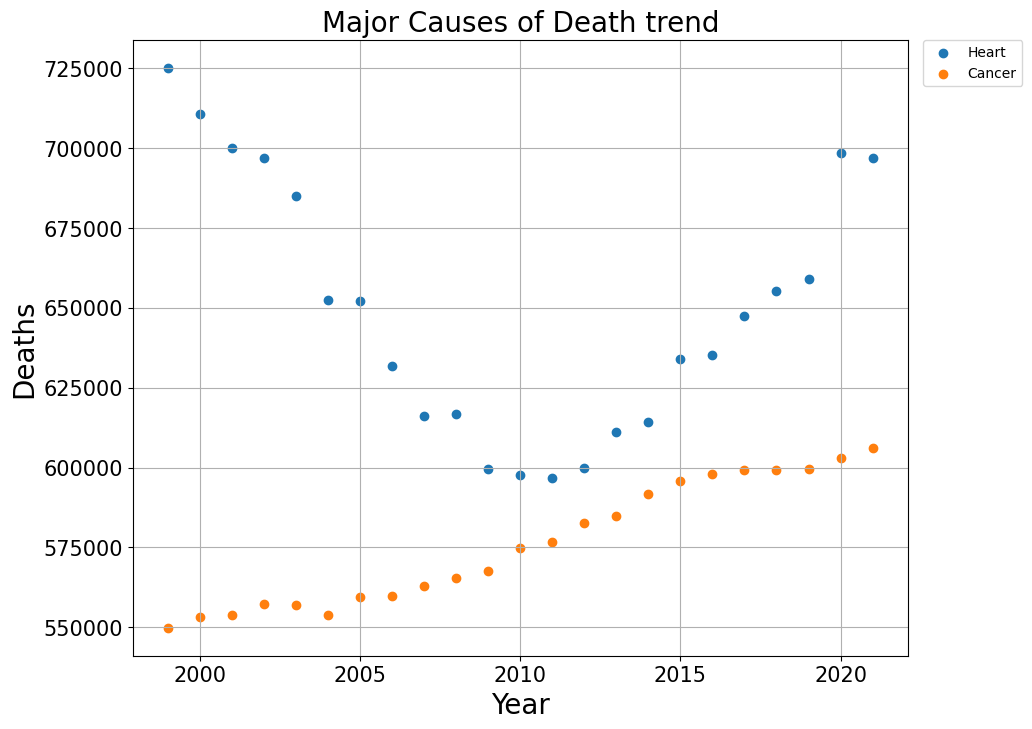

In [23]:
plt.figure(figsize=(10,8))


plt.scatter(range(1999,2022),Heart_disease, label ='Heart')
plt.scatter(range(1999,2022),Cancer_disease, label = 'Cancer')

plt.xlabel('Year', fontsize =20)
plt.ylabel('Deaths',fontsize =20)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.title('Major Causes of Death trend',fontsize =20)



Because the national mortality rate is being compared throughout the years, the comparison would be much more accurate with incorporation of age adjusted death rate by the leading causes. In the following cells below, I have generated a plot entailing age adjusted death rate by Heart disease and Cancer 

<Figure size 1200x1000 with 0 Axes>

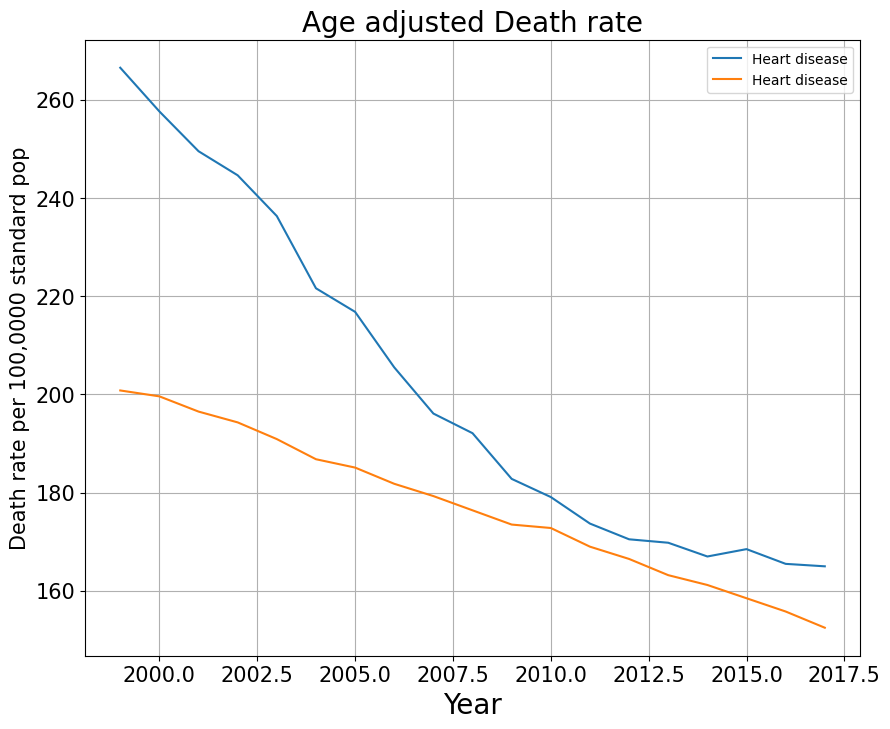

In [24]:
#initialize lists for the data and timeline
plt.figure(figsize = (12,10))

time_x = []
data_heart = []
data_cancer = []

for i in range(len(data['Deaths'])):
    if data['Cause Name'][i] == 'Heart disease' and data['State'][i]== 'United States':
        time_x.append(data['Year'][i])
        data_heart.append(data['Age-adjusted Death Rate'][i])
    if data['Cause Name'][i] == 'Cancer' and data['State'][i]== 'United States':
        data_cancer.append(data['Age-adjusted Death Rate'][i])

        
plt.figure(figsize = (10,8))
plt.plot(time_x, data_heart, label = 'Heart disease')
plt.plot(time_x, data_cancer, label = 'Heart disease')
plt.title('Age adjusted Death rate',fontsize =20)
plt.xlabel('Year',fontsize =20)
plt.ylabel('Death rate per 100,0000 standard pop',fontsize = 15)

plt.legend()
plt.grid()


Despite the representation for the distribution of mortality rate for the top two causes of death in the US, the age adjusted death rate will enable use to make accurate comparison of the death rate over the years

# I will use curve fit to make a projection for the trend of Heart disease and Cancer over the next 6 years

In [25]:
#Heart disease mortality rate
x_years = np.arange(1999,2022,1)
y_heart = np.array(Heart_disease)

def cubic_model(x,A,B,C,D):
    return(A*x**3 + B*x + C*x +D)

params, cov = curve_fit(cubic_model,x_years,y_heart, p0=[10,50,30,20])

A_estimate = params[0]
B_estimate = params[1]
C_estimate = params[2]
D_estimate = params[3]

y_fit_cubic = cubic_model(x_years, A_estimate, B_estimate, C_estimate, D_estimate)

#Cancer Mortality rate
y_cancer = np.array(Cancer_disease)

#cubic model curve fit
params1, cov1 = curve_fit(cubic_model,x_years,y_cancer, p0=[10,50,30,20])

A1_estimate = params1[0]
B1_estimate = params1[1]
C1_estimate = params1[2]
D1_estimate = params1[3]

y_fit_cubic1 = cubic_model(x_years, A1_estimate, B1_estimate,\
                           C1_estimate, D1_estimate)

In [26]:
time_x = np.array(time_x)
data_heart = np.array(data_heart)
data_cancer = np.array(data_cancer)


def quad_model(x, A, B, C):
    y1 = A*(x**2) + B*x +C
    #y1 = A2*np.power(x,2) + B2*x +C2
    return y1

#Age adjusted death rate from heart disease
param2,cov2 = curve_fit(quad_model,time_x,data_heart, p0=[10,20,200])

A2_estimate = param2[0]
B2_estimate = param2[1]
C2_estimate = param2[2]

y_fit_quad1 = quad_model(time_x, A2_estimate, B2_estimate,\
                           C2_estimate)

#Age adjusted death rate from cancer
param3,cov3 = curve_fit(quad_model,time_x,data_cancer, p0=[80,90,200])

A3_estimate = param3[0]
B3_estimate = param3[1]
C3_estimate = param3[2]

y_fit_quad2 = quad_model(time_x, A3_estimate, B3_estimate,\
                           C3_estimate)


In [27]:
# function to calculate the R^2

def r_squared(y, y_hat):
    y_bar = y.mean()
    SStot = ((y-y_bar)**2).sum()
    SSreg = ((y-y_hat)**2).sum()
    return 1 - (SSreg/SStot)

r^2 for heart disease model =  0.9459106604155286
r^2 for cancer model =  0.9683471711106003


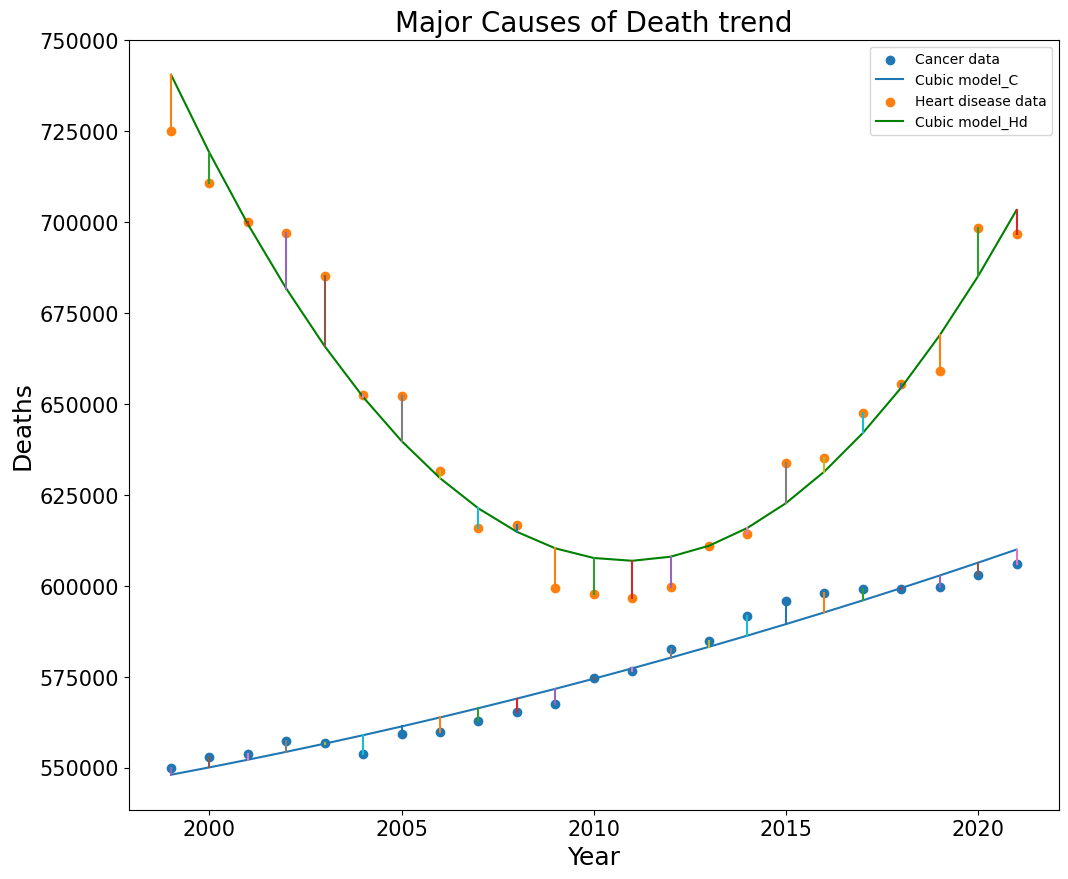

In [28]:

plt.figure(figsize=(12,10))


#plt.figure(figsize=(12,10))
plt.scatter(x_years,y_cancer, label = 'Cancer data')
plt.plot(x_years, y_fit_cubic1, label = 'Cubic model_C')
plt.scatter(x_years, y_heart,label = 'Heart disease data')
plt.plot(x_years,y_fit_cubic,label = 'Cubic model_Hd', color = 'g')

plt.xlabel('Year', fontsize = 18)
plt.ylabel('Deaths', fontsize = 18)
plt.legend()
plt.title('Major Causes of Death trend', fontsize = 20)



#plotting the residuals
sum = 0
for i in range(len(x_years)):
    plt.plot([x_years[i], x_years[i]], [y_heart[i], y_fit_cubic[i]])
    sum += abs(y_heart[i] - y_fit_cubic[i])
    
for i in range(len(x_years)):
    plt.plot([x_years[i], x_years[i]], [y_cancer[i], y_fit_cubic1[i]])
    sum += abs(y_cancer[i] - y_fit_cubic1[i])

    
print('r^2 for heart disease model = ', r_squared(y_heart,y_fit_cubic))
print('r^2 for cancer model = ', r_squared(y_cancer,y_fit_cubic1))




r^2 for heart disease model =  0.9923623534153975
r^2 for cancer model =  0.9983246616655523


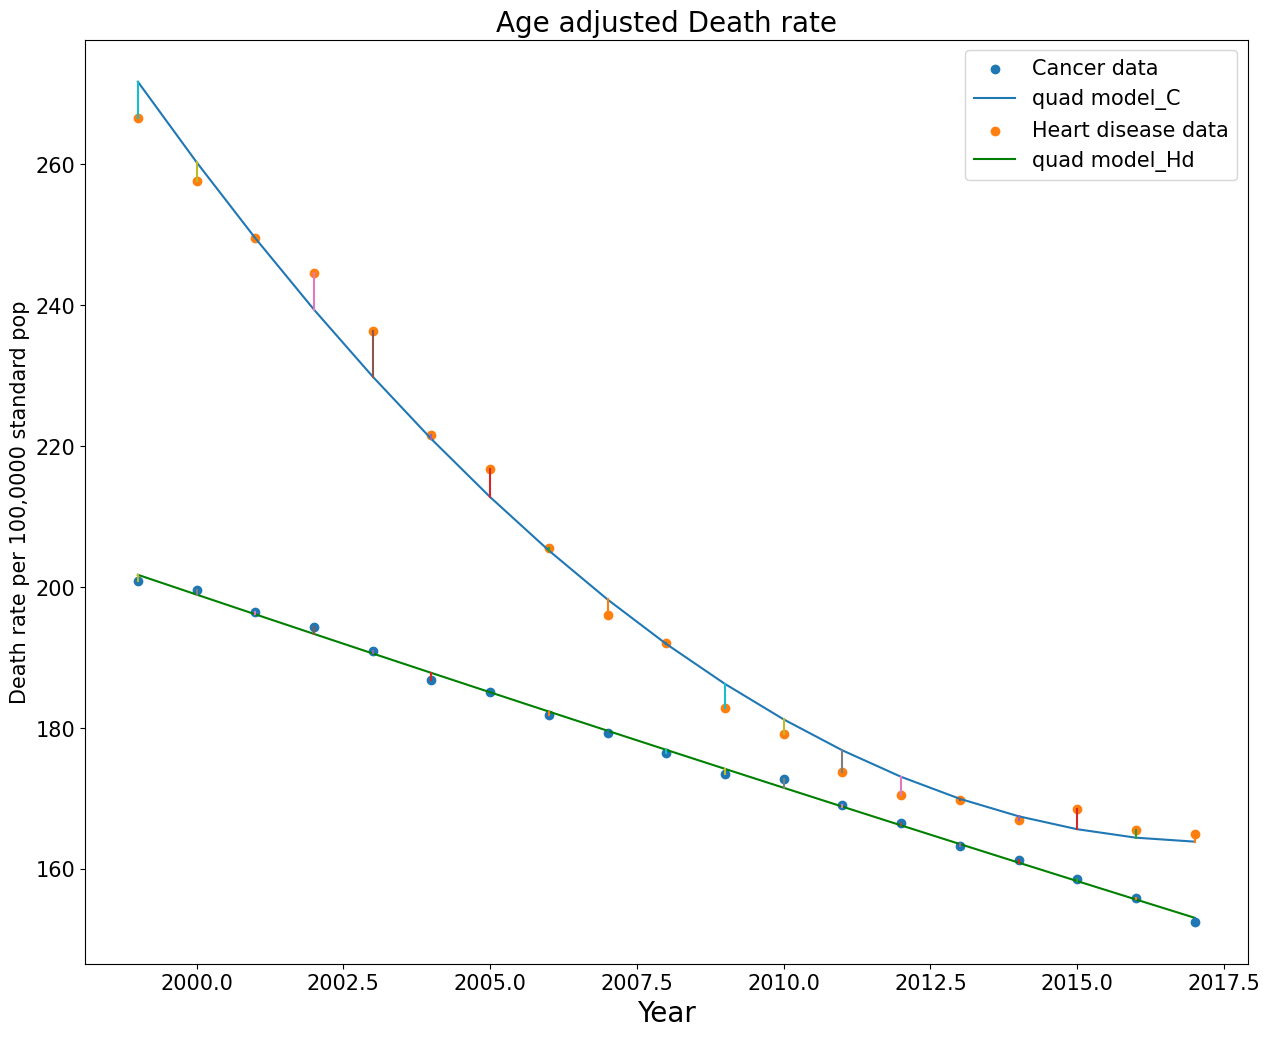

In [29]:
plt.figure(figsize=(15,12))

plt.scatter(time_x,data_cancer, label = 'Cancer data')
plt.plot(time_x, y_fit_quad1, label = 'quad model_C')
plt.scatter(time_x, data_heart,label = 'Heart disease data')
plt.plot(time_x,y_fit_quad2,label = 'quad model_Hd', color = 'g')
plt.title('Age adjusted Death rate', fontsize =20)
plt.xlabel('Year',fontsize =20)
plt.ylabel('Death rate per 100,0000 standard pop',fontsize = 15)

plt.legend(fontsize = 15)
sum = 0
for i in range(len(time_x)):
    plt.plot([time_x[i], time_x[i]], [data_heart[i], y_fit_quad1[i]])
    sum += abs(data_heart[i] - y_fit_quad1[i])
    
for i in range(len(time_x)):
    plt.plot([time_x[i], time_x[i]], [data_cancer[i], y_fit_quad2[i]])
    sum += abs(data_cancer[i] - y_fit_quad2[i])

    
print('r^2 for heart disease model = ', r_squared(data_heart,y_fit_quad1))
print('r^2 for cancer model = ', r_squared(data_cancer,y_fit_quad2))

Heart Disease Methodology. US mortality rate due to heart disease has a non linear distribution. The trend shows a decrease in mortalitry rate from 1999 to late 2010 and an increase up to date. Despite such transformations, it has been the leading cause of death in the US throughout the years. 

In [30]:
print('r^2 for heart disease quadratic model = ', r_squared(data_heart,y_fit_quad1))
print('r^2 for cancer quadratic model = ', r_squared(data_cancer,y_fit_quad2))
print('r^2 for heart disease cubic model = ', r_squared(y_heart,y_fit_cubic))
print('r^2 for cancer cubic model = ', r_squared(y_cancer,y_fit_cubic1))

r^2 for heart disease quadratic model =  0.9923623534153975
r^2 for cancer quadratic model =  0.9983246616655523
r^2 for heart disease cubic model =  0.9459106604155286
r^2 for cancer cubic model =  0.9683471711106003


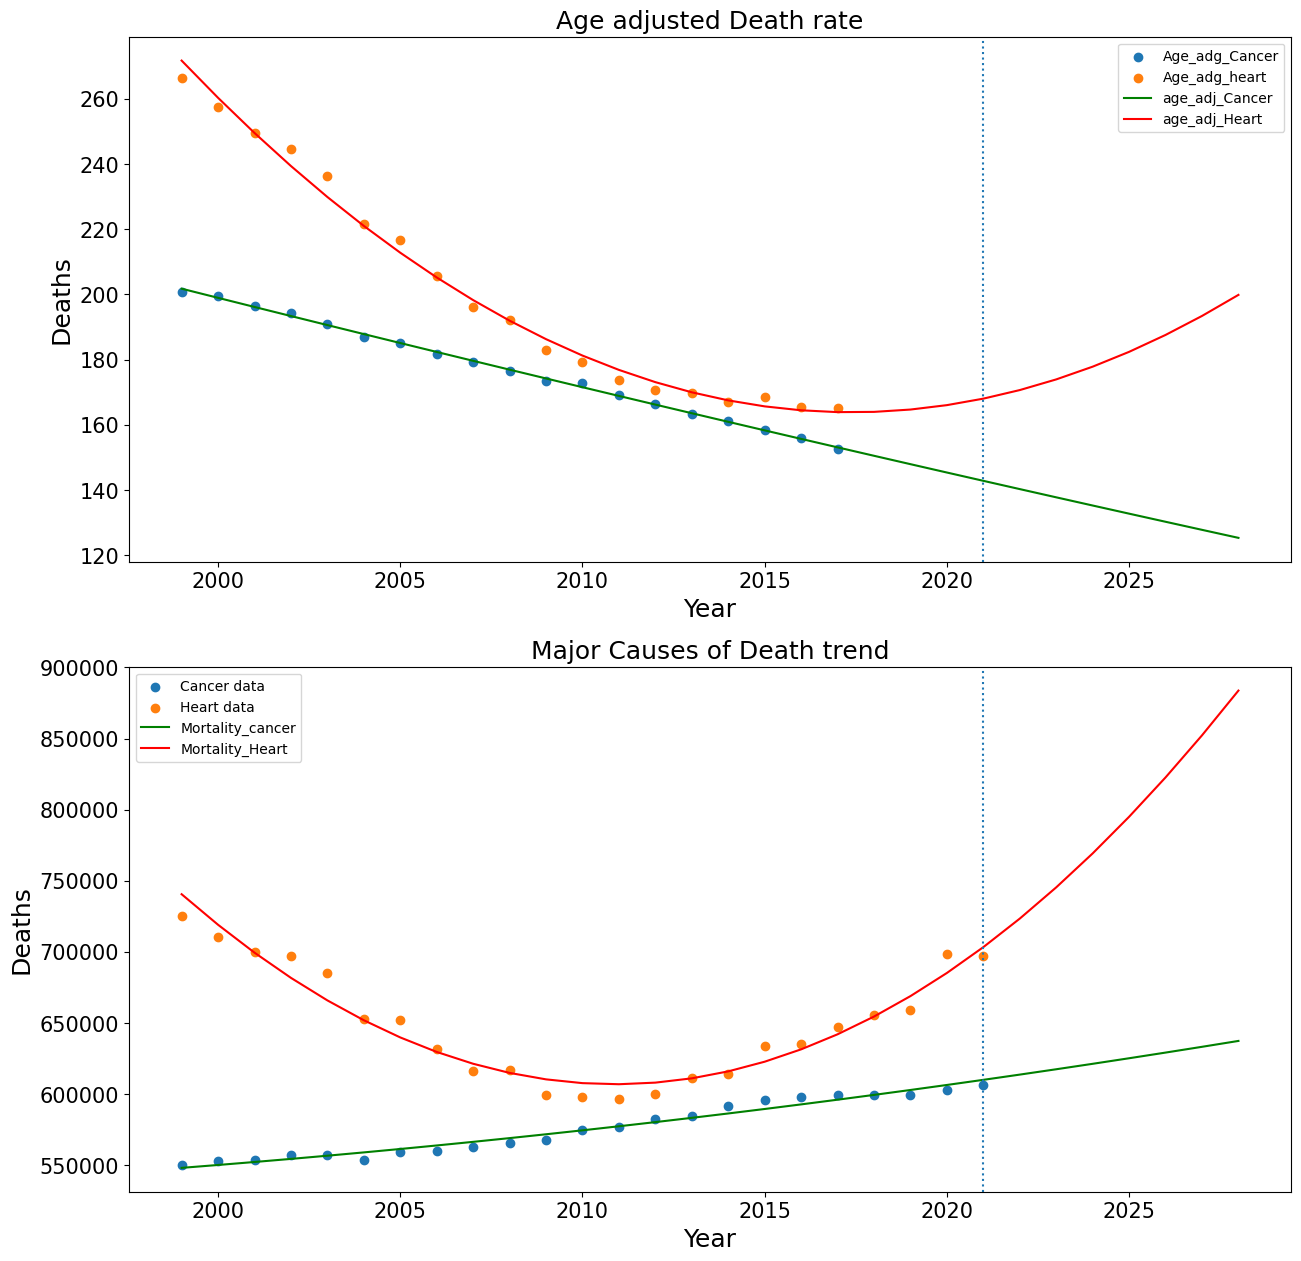

In [31]:
#initialize a new time array for projections
time_proj = np.arange(1999,2029,1)

#age adjusted death rate by cancer
y_fit_quad2 = quad_model(time_proj, A3_estimate, B3_estimate,\
                           C3_estimate)

#age adjusted death rate by heart disease
y_fit_quad1 = quad_model(time_proj, A2_estimate, B2_estimate,\
                           C2_estimate)

#Mortalityr rate by Cancer
y_fit_cubic1 = cubic_model(time_proj, A1_estimate, B1_estimate, C1_estimate, D1_estimate)


#Mortalityr rate by Heart diseasee
y_fit_cubic = cubic_model(time_proj, A_estimate, B_estimate, C_estimate, D_estimate)


plt.figure(figsize = (15,15))
plt.subplot(2,1,1)

plt.scatter(time_x,data_cancer, label = 'Age_adg_Cancer')
plt.scatter(time_x,data_heart, label = 'Age_adg_heart')
plt.plot(time_proj, y_fit_quad2, label = 'age_adj_Cancer', color = 'g')
plt.plot(time_proj, y_fit_quad1, label = 'age_adj_Heart', color = 'r')
plt.legend()
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Deaths',fontsize = 18)
plt.title('Age adjusted Death rate',fontsize = 18)
plt.axvline(x = 2021, linestyle = 'dotted')

plt.subplot(2,1,2)
plt.scatter(x_years, y_cancer, label = 'Cancer data')
plt.scatter(x_years, y_heart, label = 'Heart data')
plt.plot(time_proj, y_fit_cubic1, label = 'Mortality_cancer', color = 'g')
plt.plot(time_proj, y_fit_cubic, label = 'Mortality_Heart', color = 'r')
plt.legend()
plt.xlabel('Year',fontsize = 18)
plt.ylabel('Deaths',fontsize = 18)
plt.title('Major Causes of Death trend',fontsize = 18)
plt.axvline(x = 2021,linestyle = 'dotted')

In [32]:
#trend_21 = data_22_yr.loc[2021]
data_22_yr = data_22_yr.drop(columns = ['Other Diseases of Respiratory System',\
                                        'Nephritis, Nephrotic Syndrome and Nephrosis',
                                       'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified',\
                                       'Assault (Homicide)','Month',\
                                       'COVID-19 (Multiple Cause of Death)',\
                                       'Septicemia', 'Motor Vehicle Accidents',\
                                       'All Cause', 'Natural Cause'], axis = 1)

data_22_yr =  data_22_yr.rename(columns = {'Intentional Self-Harm (Suicide)':'suicide'})
data_22_yr =  data_22_yr.rename(columns = {'Diabetes Mellitus': 'Diabetes'})


In [33]:
# Only use the total national data (united states)
indexState = data[ (data['State'] != 'United States')].index
cause_aspect = data.drop(indexState , inplace=True)
cause_aspect = data.drop(columns = ['Age-adjusted Death Rate','State'], axis = 1)
cause_aspect.head(15)

#cause_aspect.groupby('Year')
cause_aspect.head()

Year              Cause Name   Deaths
0    2017  Unintentional injuries   169936
52   2017              All causes  2813503
104  2017     Alzheimer's disease   121404
156  2017                  Stroke   146383
208  2017                    CLRD   160201

In [34]:
#change the cause Name from rows to columns for better access
cause_aspect = data.pivot_table('Deaths', ['Year'], ['Cause Name'])

cause_aspect = cause_aspect.drop(columns = ['All causes','Kidney disease'], axis = 1)
cause_aspect.head()

Cause Name  Alzheimer's disease    CLRD  Cancer  Diabetes  Heart disease  \
Year                                                                       
1999                      44536  124181  549838     68399         725192   
2000                      49558  122009  553091     69301         710760   
2001                      53852  123013  553768     71372         700142   
2002                      58866  124816  557271     73249         696947   
2003                      63457  126382  556902     74219         685089   

Cause Name  Influenza and pneumonia  Stroke  Suicide  Unintentional injuries  
Year                                                                          
1999                          63730  167366    29199                   97860  
2000                          65313  167661    29350                   97900  
2001                          62034  163538    30622                  101537  
2002                          65681  162672    31655                  106742  
2003                          65163  157689    31484                  109277

## Results

Text(0.5, 1.0, 'Mortality trends in 2017')

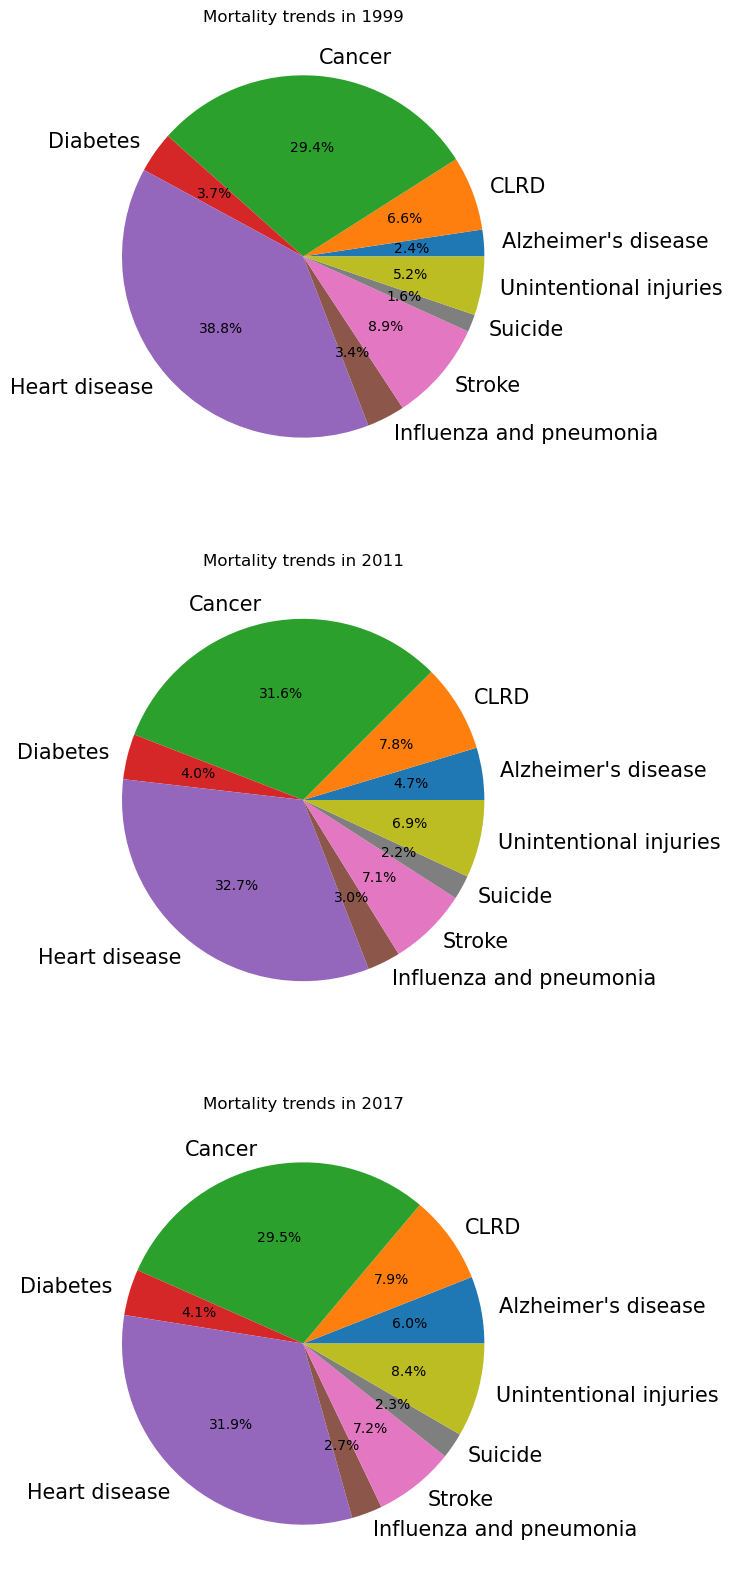

In [35]:
plt.figure(figsize = (20,20))
plt.subplot(3,1,1)

plt.pie(cause_aspect.loc[1999], labels = cause_aspect.columns, autopct='%1.1f%%')
plt.title('Mortality trends in 1999')


plt.subplot(3,1,2)
plt.pie(cause_aspect.loc[2011], labels = cause_aspect.columns, autopct='%1.1f%%')
plt.title('Mortality trends in 2011')

plt.subplot(3,1,3)
plt.pie(cause_aspect.loc[2017], labels = cause_aspect.columns, autopct='%1.1f%%')
plt.title('Mortality trends in 2017')



Text(0.5, 1.0, 'Mortality trends in 2021')

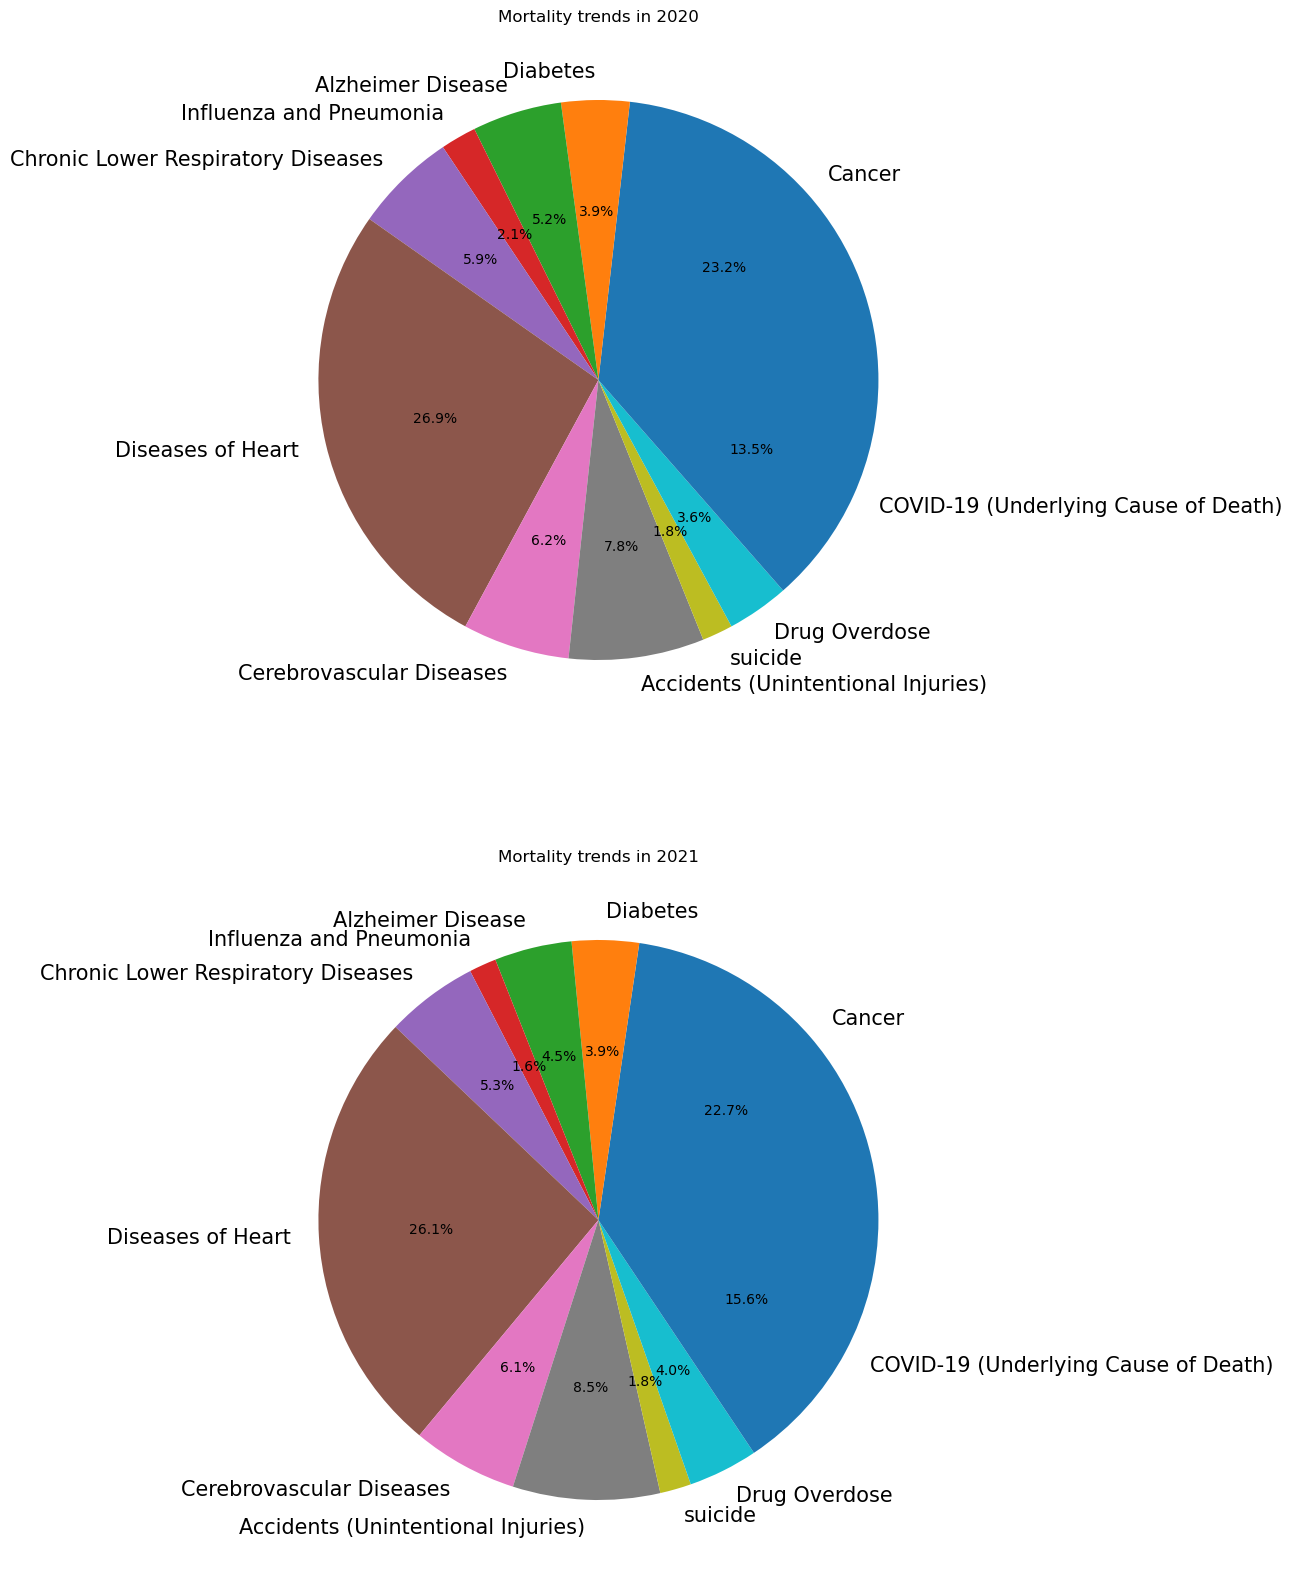

In [36]:
plt.figure(figsize = (20,20))
plt.subplot(2,1,1)


plt.pie(data_22_yr.loc[2020], labels = data_22_yr.columns, autopct='%1.1f%%')
plt.title('Mortality trends in 2020')

plt.subplot(2,1,2)


plt.pie(data_22_yr.loc[2021], labels = data_22_yr.columns, autopct='%1.1f%%')
plt.title('Mortality trends in 2021')

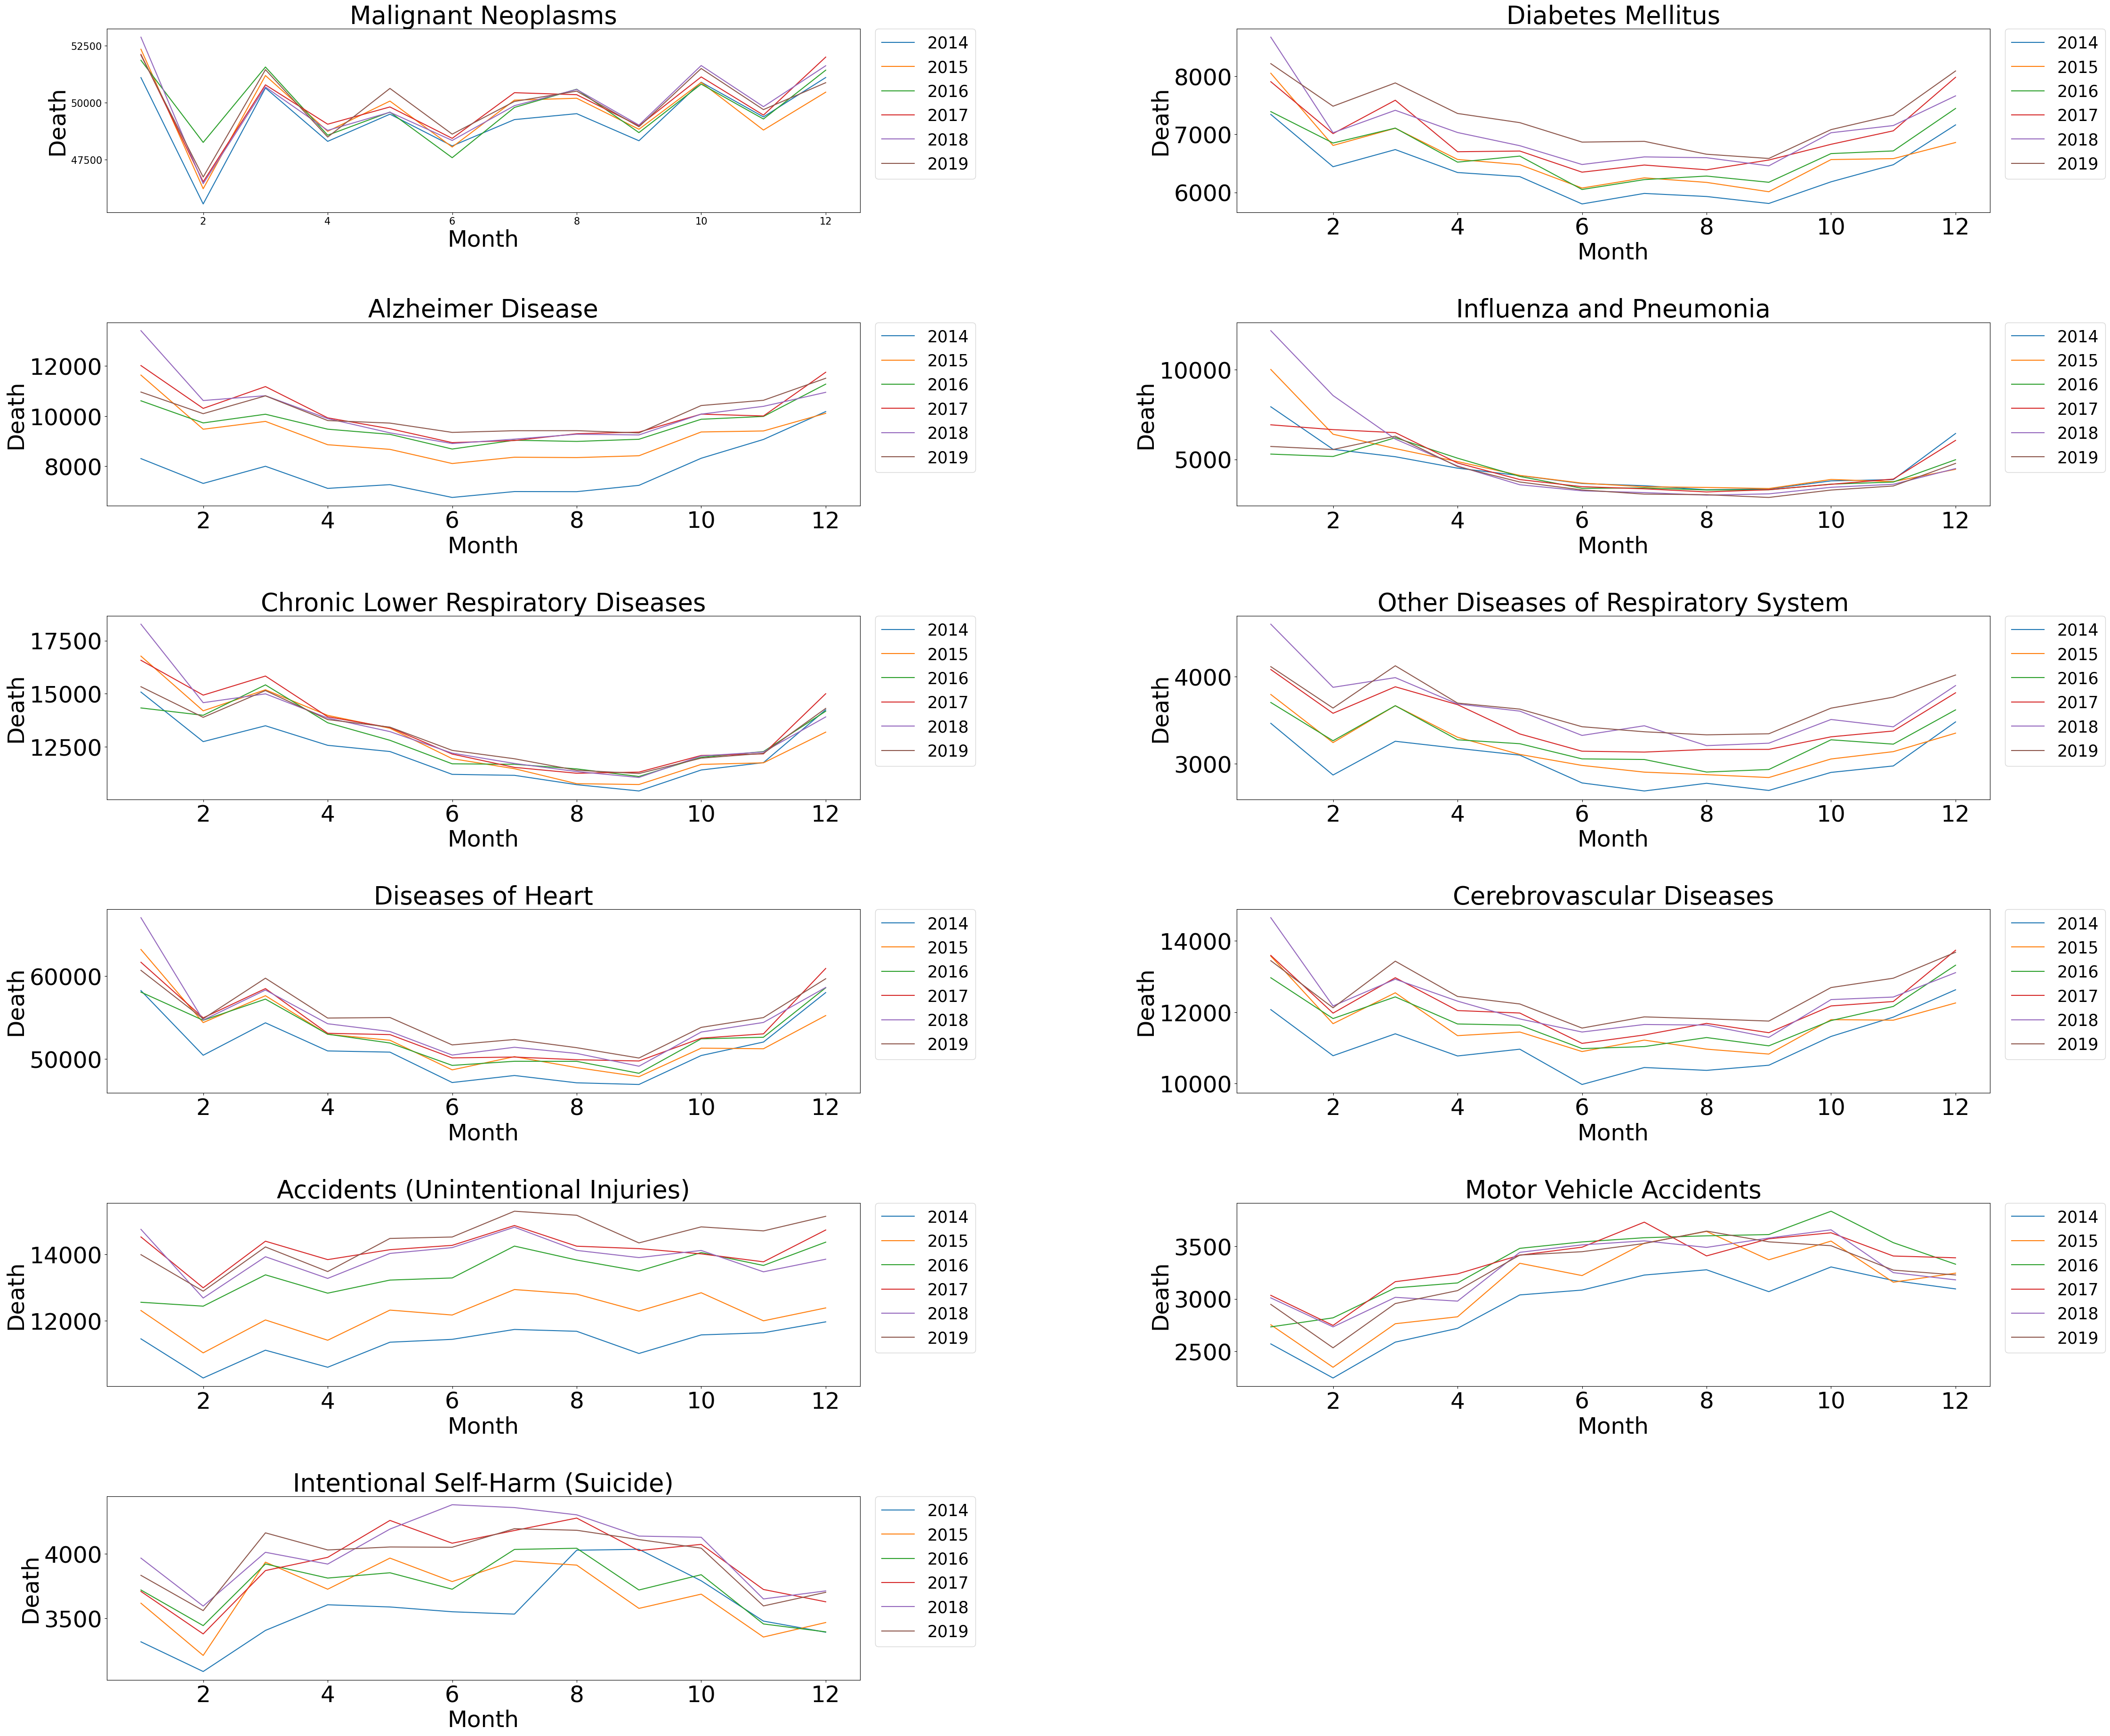

In [37]:
def by_cause_month(cause):
    
    
    for year in range(2014,2020):
        df_year = data_19[data_19['Year']==year] #year mask 
        year_list = []
        for month in range(1,13):
            df_month = df_year[df_year['Month']==month]  #month mask
            year_list.append(df_month[cause])
        
        
        plt.plot(range(1,13), year_list, label = year)
        plt.title(cause, fontsize = 38)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,\
              fontsize = 25)

    plt.xlabel('Month', fontsize = 35)
    plt.ylabel('Death',fontsize = 35)
    
    plt.rc('xtick',labelsize=35)
    plt.rc('ytick',labelsize=35)
    
    return by_cause_month
count = 0


#visualize the trendline for each cause of death associated with dataset (14-19)
plt.figure(figsize = (100,150))


for i in cols:
    count += 1 
    plt.subplot(10,2,count)
    by_cause_month(i)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=0.5,
                    wspace=0.5,
                    hspace=0.6)

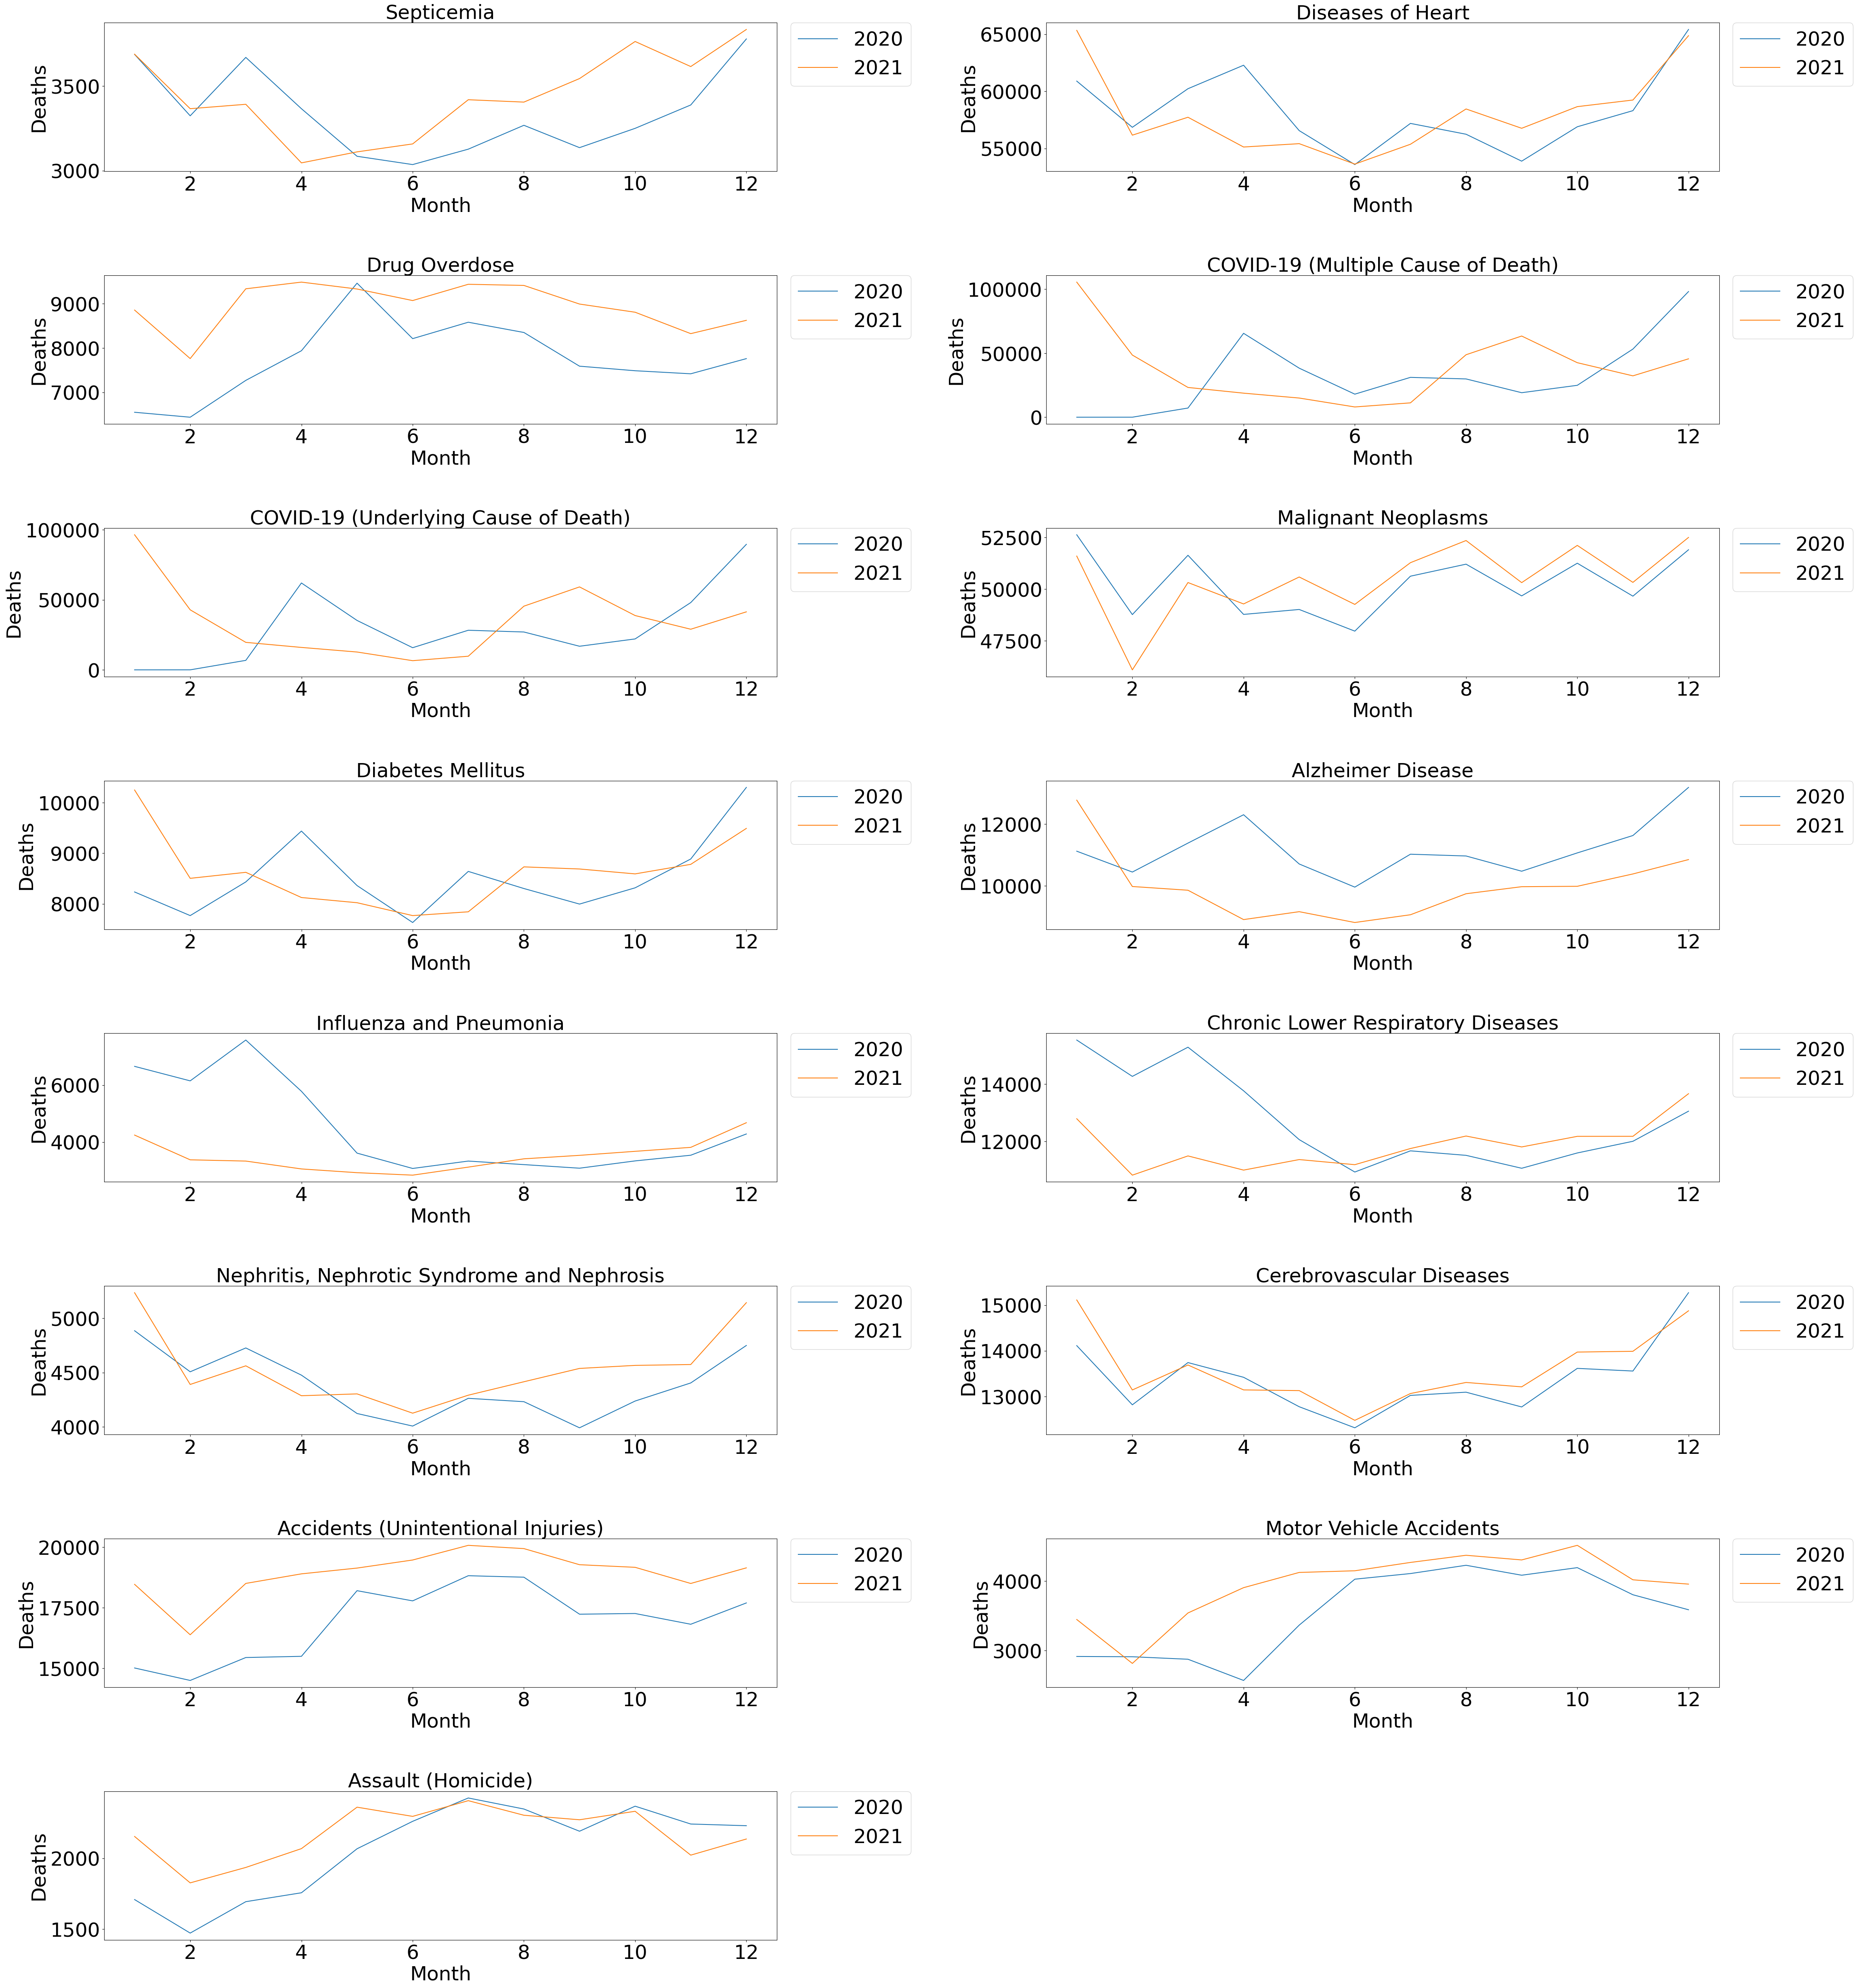

In [38]:
plt.figure(figsize = (100,150))
#fig = plt.figure(figsize=(100,100))

def trend_by_month(cause):
    for year in range(2020,2023):
        df_year = data_22[data_22['Year']==year] #year mask 
        year_list = []
        for month in range(1,13):
            df_month = df_year[df_year['Month']==month]  #month mask
            year_list.append(df_month[cause])

        plt.plot(range(1,13), year_list, label = year)
        plt.title(cause,fontsize = 35)
    
    plt.xlabel('Month', fontsize = 35)
    plt.ylabel('Deaths', fontsize = 35)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,\
               fontsize = 35)
    plt.tight_layout()




    return trend_by_month

count = 0

for i in col_cause:
    count += 1 
    plt.subplot(10,2,count)
    trend_by_month(i)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.5,
                    top=0.5,
                    wspace=0.4,
                    hspace=0.7)

[740528.23410082 719042.96925402 699436.58350992 681710.01630259
 665864.20707178 651900.095263   639818.6203084  629620.72165155
 621307.33873224 614879.41098833 610337.87785769 607683.6787858
 606917.75320673 608041.04056215 611054.48029566 615959.01183748
 622755.57463312 631445.10812235 642028.55174303 654506.84493494
 668880.92713594 685151.73779154 703320.21633577 723387.30220842
 745353.93485308 769221.05370569 794989.59820414 822660.5077939
 852234.72191095 883713.17999315]


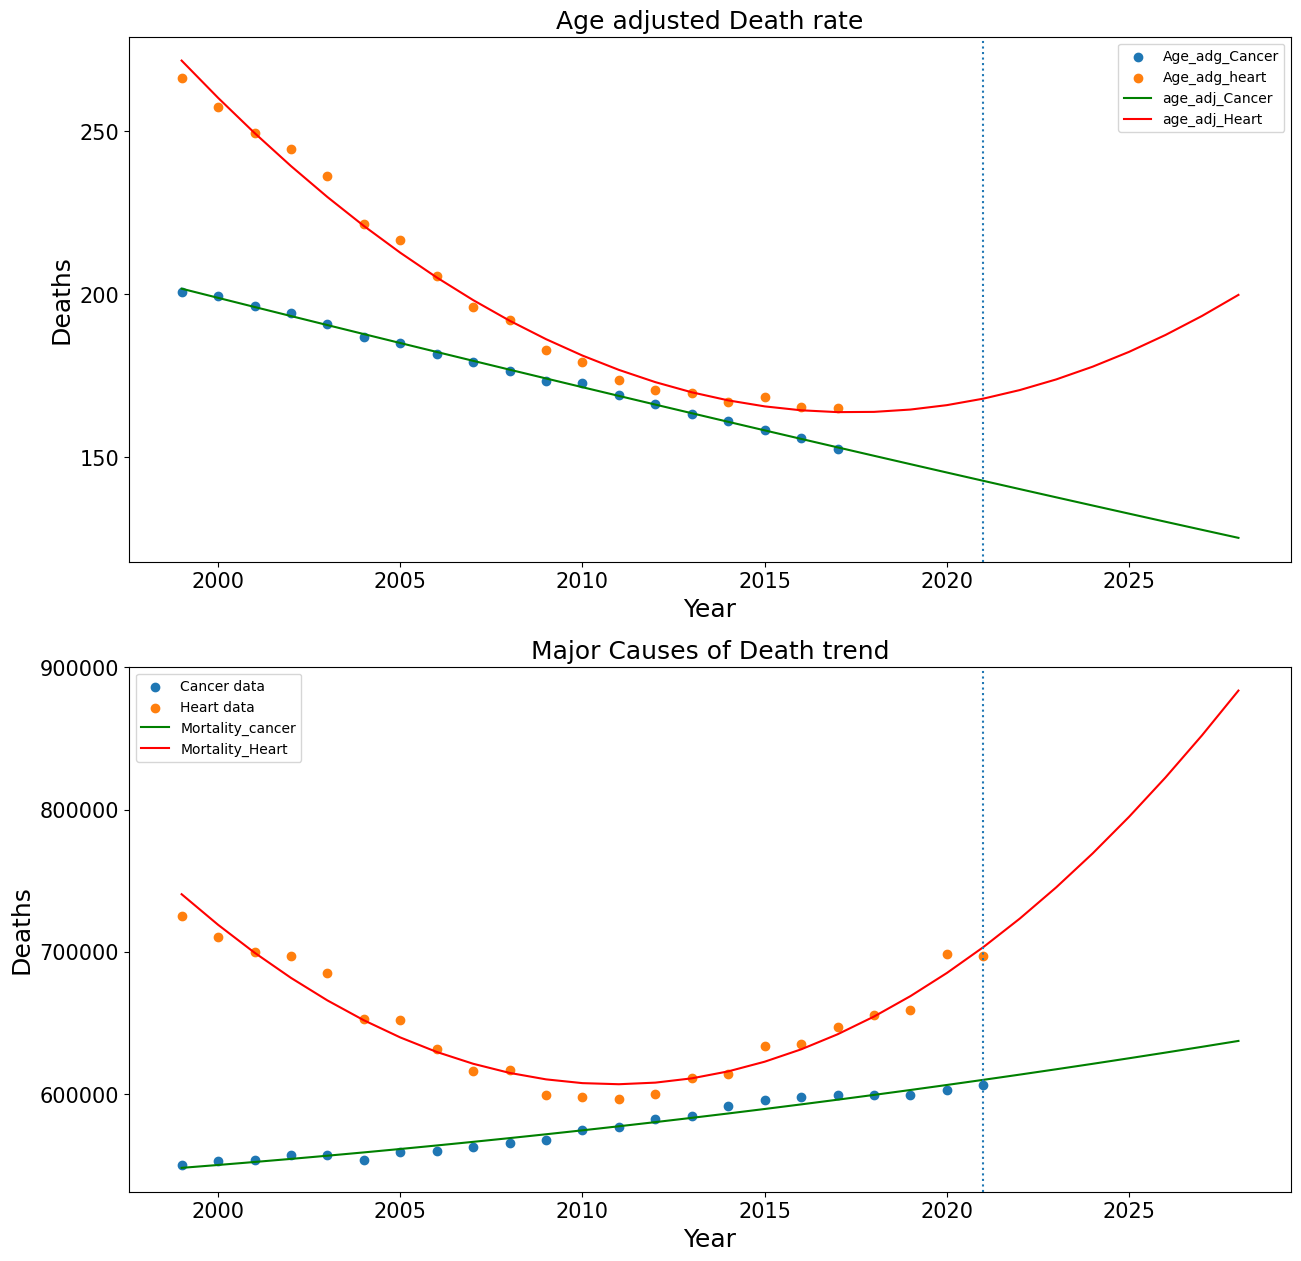

In [39]:
plt.figure(figsize = (15,15))
plt.subplot(2,1,1)

plt.scatter(time_x,data_cancer, label = 'Age_adg_Cancer')
plt.scatter(time_x,data_heart, label = 'Age_adg_heart')
plt.plot(time_proj, y_fit_quad2, label = 'age_adj_Cancer', color = 'g')
plt.plot(time_proj, y_fit_quad1, label = 'age_adj_Heart', color = 'r')
plt.legend()
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Deaths',fontsize = 18)
plt.title('Age adjusted Death rate',fontsize = 18)
plt.axvline(x = 2021, linestyle = 'dotted')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)



plt.subplot(2,1,2)
plt.scatter(x_years, y_cancer, label = 'Cancer data')
plt.scatter(x_years, y_heart, label = 'Heart data')
plt.plot(time_proj, y_fit_cubic1, label = 'Mortality_cancer', color = 'g')
plt.plot(time_proj, y_fit_cubic, label = 'Mortality_Heart', color = 'r')
plt.legend()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Year',fontsize = 18)
plt.ylabel('Deaths',fontsize = 18)
plt.title('Major Causes of Death trend',fontsize = 18)
plt.axvline(x = 2021,linestyle = 'dotted')
print(y_fit_cubic)

 After extensive data manipulation and visualization, the demonstrated trendlines can be analyzed. With the means of various graphs, It is evident that there has been an overall increase in deaths by Heart disease as well as Cancer within the last 22 years. However the deaths by Heart disease decreased from 1999 to around 2011 and then plummeted up. The deaths by cancer show a steady, almost linear increase throughout the years.  

## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

   1. The most time consuming and tideious challene that I faced throughout the project was data cleaning. With the given data and my proposed criterion it was hard to transform the dataframe or to access the necessaray parameters. In terms of dataset, I couldn't find one exact data file including the same causes of death up to the most recent year, hence I had search and find something similar to fill the gaps; I had a data file for 1999-2017, another one from 2014-2019, and the final one for 2020-2022. There were so many different data available across various platforms which made it even harder for me to pick one. 

   2.Although the amount of workload extensively increased, the data manipulation and cleaning got easier across one another as I continued to explore the modes of their organization. I had envisioned that I could model up to 10 factors for this project however with the data distribution as well as the workload it was reasonable to go with the top two leading causes of death in the US.
   3. Somethings that I would do differently would be schedueling or making a timeline and starting on the project sooner so that I can get much more detailed work and enough help from the teaching stuff. Another thing I would do differently is communicate more with my group and ask for feedback on my progress; I found the second project checkpoint very useful where as a group everyone within my team gave very mindful feedbacks on the proposed plan. 

From my results, it is evident that there's an increase in trends of deaths due to heart disease and cancer. The indicated graphs from 2014 to 2021 with the monthly distribution of the major death causes show that mostly the deaths are higher on the beginning and the end of the higher; it starts high and lowers until around October then starts to increase again. This characteristic is visible for most of the causes yet not all and it appears that the trend has been consistent throughout the years.
- It is plausible to infer that the death overall is seasonal with a bias towards winter. 
- In the United States, the overall age-adjusted  death rate by cancer decreased from 200.8 deats per 100,000 population in 1999 to 152.5 in 2017.
- The projection model predicts the overall age_adjusted death rate by cancer to decrease from 152.5 in 2017 to 125.3 deaths per 100,000 population in 2028
- The overall age_adjusted heart disease death rate decreased from 266.5 deaths per 100,000 population in 1999 to 165 in 2017
- The projection model predicts the overall age_adjusted death rate by Heart disease to decrease from 165 in 2017 to 199.8 deaths per 100,000 population in 2028

Despite the predicted decrease in the age adjusted death rate by cancer and heart disease, it is predicted that the deaths from cancer disease will increase from 606030 in 2021 to 637363.90 deaths in 2028, and deaths from Heart disease will increase from 696770 in 2021 to 883713.2 deaths in 2028 respectively. 

### References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. **Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_


Sawye, A., &amp; Flagg, L. A. (2021, December 9). Products - data briefs - number 425 - December 2021. Centers for Disease Control and Prevention. Retrieved December 7, 2022, from https://www.cdc.gov/nchs/products/databriefs/db425.htm 

Department of public health. (n.d.). Mortality statistics. CT.gov. Retrieved December 7, 2022, from https://portal.ct.gov/dph/Health-Information-Systems--Reporting/Mortality/Mortality-Statistics 

NIH. (n.d.). Age-adjustment. U.S. National Library of Medicine. Retrieved December 7, 2022, from https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod5_age.html 

Richie, R., Hayden, A., &amp; Sharma               1, M. (1960, August 1). Python pandas: Convert rows as column headers. Stack Overflow. Retrieved December 7, 2022, from https://stackoverflow.com/questions/17298313/python-pandas-convert-rows-as-column-headers 

Geeks. (2022, September 20). Drop rows from the dataframe based on certain condition applied on a column. GeeksforGeeks. Retrieved December 7, 2022, from https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/ 